<a href="https://colab.research.google.com/github/EnadiP/CTCarAccidents/blob/main/CarAccidentFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction


Dataset location : https://www.ctcrash.uconn.edu/

##**Why use this data? What is the significance?**

Connecticut has teamed with UCONN to make a dataset for all vehicle accidents in the state. The system requires an account in order to retrieve the data through an email. 

In order to optiamlly understand CT accidents well, we exported all the data for the past 3 years without deaths for ethical and file size purposes. 
The original file was sent in 4 files and about half a gigabyte in size. Due to github file size restraints we had to reduce the file size down to 25mb. 

The dataset being used is a combination of information from all 4 files and filtered down to having car brands that are not misspelt to ensure accurate analysis. 

Understanding the roadways of CT and the nature of severe accidents we can all make better decisions for our personal driving patterns and what situations to try and avoid. 

##**Questions We Look to Answer**

As we want to provide meaningful insights to accident severity, ages, manufactorors, vehicle colors, time of day, seasonality, and impacts from covid on driving. These factors can be looked at with these questions:

1. What manufactoror has the most severe accidents?
2. What car color has the most severe accidents?
3. Which gender is more likely to be a severe accident?
4. What time of day do accidents mainly occur? 
5. What type of roadway has the most accidents?
6. What driver age range has the most accidents?
7. What are the road conditions for most accidents?
8. What towns or cities have the most accidents? 
9. Is there a certain direction that most accidents occur? 
10. Does registration status have an impact on chances of severe accidents? 

##**Data Dictionary**

| Field Name  |  Description |
|----------|-------------|
| CrashId | Indendifier of Accident Record  |
| Latitude |  Latitude of Accident Location  |
| Longitide | Longitude of Accident Location |
| Make | Vehicle Manufacturor  |
|ModelYear| Model Year of Vehicle |
|Model| Car Model |
|Color| Color of Vehicle |
|Age|  Age of Driver |
|Gender| Gender of Driver|
|EjetionStatus| Wether a Person was thrown out of the vehicle|
|DriverActions | Diver Action Before Accident|
|DOTCaseNumber| Identifier|
|Direction| Direction Vehicle was Traveling Before Accident|
|VehicleManuver| Vehicle Action Before Accident|
|InvalidResistration| Status of Vehicle Registration|
|MissingResistration| Location of Paperwork |
|InsuranceExpirationDate| Insurance Expiration Date|
|TownName| Town of Accident|
|DateOfCrash | Date of Accident|
|Year| Year of Accident|
|Month|Month of Accident|
|Day|Day of Accident|
|DayoftheWeekTextFormat|Day of the Week of Accident|
|HouroftheDay| Hour Accident Occured|
|MostSevereInjuryTextFormat| Severity of Injury|
|NumberOfMotorVehicles| Number of Vehicles in Accident|
|NumberOfNon-Motorist| Number of Pedestrians in Accident|
|NumberOfWitnesses| Number of Witnesses|
|RouteClassTextFormat| Type of Roadway|
|RoadwayName| Name of Roadway|
|FirstHarmfulEventTextFormat| Event that Caused Peronal Injury|
|MannerofCrash/CollisionImpactTextFormat| Where on Vehicle Collision Occured|
|LocationofFirstHarmfulEventTextFormat| Where on the road the Accident took Place| 
|WeatherConditionTextFormat| Weather Consition|
|LightConditionTextFormat| Light Condition|
|RoadSurfaceConditionTextFormat| Road Surface Condition|
|CrashSpecificLocationTextFormat| Type of Road Connection|
|TypeofIntersectionTextFormat|Intersection Indicator| 
|PoliceAgencyTextFormat| Reporting Police Agency|
|InsuranceCarrier| Insurance Vehicle Owner Has|
|ExpiredInsurance| Wether or not Insurance was Expired|

In [64]:
accident_data.head()

,CrashId,Latitude,Longitude,Make,ModelYear,Model,Color,Age,Gender,EjectionStatus,DriverActions,DOTCaseNumber,Direction,VehicleManuver,InvalidResistration,MissingResistration,InsuranceExpirationDate,TownName,DateOfCrash,Year,Month,Day,DayoftheWeekTextFormat,HouroftheDay,MostSevereInjuryTextFormat,NumberOfMotorVehicles,NumberOfNon-Motorist,NumberOfWitnesses,RouteClassTextFormat,RoadwayName,FirstHarmfulEventTextFormat,MannerofCrash/CollisionImpactTextFormat,LocationofFirstHarmfulEventTextFormat,WeatherConditionTextFormat,LightConditionTextFormat,RoadSurfaceConditionTextFormat,CrashSpecificLocationTextFormat,TypeofIntersectionTextFormat,PoliceAgencyTextFormat,InsuranceCarrier,ExpiredInsurance
0,614657,41.954014,-72.182635,volkswagen,2008,jetta,white,23,Female,Not Ejected,Failed to Keep in Proper Lane,3036356,Eastbound,Negotiating a Curve,false,false,2000-01-01,Ashford,2019-02-25,2019,2,25,Monday,7,Possible Injury (C),1,0,0,Local,HILLSIDE RD,Utility Pole/Light Support,Not Applicable,Roadside,Clear,Daylight,Snow,Non-Junction,Not at Intersection,State Police,govt employee ins,Yes
1,614660,41.895795,-72.039451,chevrolet,2008,silverado k2500hd,red,28,Male,Not Ejected,Not Applicable,3038517,Eastbound,Negotiating a Curve,false,false,2000-01-01,Pomfret,2019-02-25,2019,2,25,Monday,7,Suspected Minor Injury (B),1,0,0,State,244-E,Utility Pole/Light Support,Not Applicable,Roadside,Clear,Daylight,Ice / Frost,Non-Junction,Not at Intersection,State Police,united ohio insurance,Yes
2,614678,41.592954,-71.969883,ford,1988,mustang lx,blue,43,Female,Not Ejected,No Contributing Action,3038711,Eastbound,Slowing,false,false,2000-01-01,Griswold,2019-02-25,2019,2,25,Monday,14,Possible Injury (C),2,0,0,State,138-E,Motor Vehicle in Operation,Front to rear,On Roadway,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,geico general insurance company,Yes
3,614680,41.563682,-73.057802,honda,2004,accord lx,tan,33,Female,Not Ejected,Over-Correcting/Over-Steering,3036211,Northbound,Other,false,false,2000-01-01,Waterbury,2019-02-25,2019,2,25,Monday,14,Suspected Minor Injury (B),1,0,0,State,8-N,Concrete Traffic Barrier,Not Applicable,Shoulder,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,state farm,Yes
4,614681,41.998752,-71.852445,hyundai,2010,elantra blue/gls/se,blue,39,Female,Not Ejected,Ran Off Roadway,3036731,Northbound,Changing Lanes,false,false,2000-01-01,Thompson,2019-02-25,2019,2,25,Monday,15,Possible Injury (C),1,0,0,Interstate,395-N,Guardrail Face,Not Applicable,On Roadway,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,metropolitan group property and casualty insur...,Yes


# Import Modules and Files


In [1]:
# import modules needed to do analysis
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from zipfile import ZipFile
from io import BytesIO
from urllib.request import urlretrieve
import seaborn as sns


In [3]:
# import data from drive 
accident_data = pd.read_csv('/content/CarData3.csv')
accident_data_copy = pd.read_csv('/content/CarData3.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Data Understanding and Cleaning 

In [4]:
# top of the data 
# make sure the file works 
# get an understanding of its components
accident_data.head()

,CrashId,Latitude,Longitude,Make,Model Year,Model,Color,Age,Gender,Ejection Status,Driver Actions,DOT Case Number,Direction,Vehicle Manuver,Invalid Resistration,Missing Resistration,Insurance Expiration Date,Town Name,Date Of Crash,Year,Month,Day,Day of the Week Text Format,Hour of the Day,Most Severe Injury Text Format,Number Of Motor Vehicles,Number Of Non-Motorist,Number Of Witnesses,Route Class Text Format,Roadway Name,First Harmful Event Text Format,Manner of Crash / Collision Impact Text Format,Location of First Harmful Event Text Format,Weather Condition Text Format,Light Condition Text Format,Road Surface Condition Text Format,Crash Specific Location Text Format,Type of Intersection Text Format,Police Agency Text Format,Insurance Carrier
0,614657,41.954014,-72.182635,Volkswagen,2008,Jetta,White,23,Female,Not Ejected,Failed to Keep in Proper Lane,3036356,Eastbound,Negotiating a Curve,FALSE,FALSE,NaN,Ashford,2/25/19,2019,2,25,Monday,7,Possible Injury (C),1,0,0,Local,HILLSIDE RD,Utility Pole/Light Support,Not Applicable,Roadside,Clear,Daylight,Snow,Non-Junction,Not at Intersection,State Police,Govt Employee Ins
1,614660,41.895795,-72.039451,Chevrolet,2008,Silverado K2500hd,Red,28,Male,Not Ejected,Not Applicable,3038517,Eastbound,Negotiating a Curve,FALSE,FALSE,NaN,Pomfret,2/25/19,2019,2,25,Monday,7,Suspected Minor Injury (B),1,0,0,State,244-E,Utility Pole/Light Support,Not Applicable,Roadside,Clear,Daylight,Ice / Frost,Non-Junction,Not at Intersection,State Police,United Ohio Insurance
2,614678,41.592954,-71.969883,Ford,1988,Mustang LX,Blue,43,Female,Not Ejected,No Contributing Action,3038711,Eastbound,Slowing,FALSE,FALSE,NaN,Griswold,2/25/19,2019,2,25,Monday,14,Possible Injury (C),2,0,0,State,138-E,Motor Vehicle in Operation,Front to rear,On Roadway,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,GEICO General Insurance Company
3,614680,41.563682,-73.057802,Honda,2004,Accord LX,Tan,33,Female,Not Ejected,Over-Correcting/Over-Steering,3036211,Northbound,Other,FALSE,FALSE,NaN,Waterbury,2/25/19,2019,2,25,Monday,14,Suspected Minor Injury (B),1,0,0,State,8-N,Concrete Traffic Barrier,Not Applicable,Shoulder,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,State Farm
4,614681,41.998752,-71.852445,Hyundai,2010,Elantra Blue/gls/se,Blue,39,Female,Not Ejected,Ran Off Roadway,3036731,Northbound,Changing Lanes,FALSE,FALSE,NaN,Thompson,2/25/19,2019,2,25,Monday,15,Possible Injury (C),1,0,0,Interstate,395-N,Guardrail Face,Not Applicable,On Roadway,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,Metropolitan Group Property and Casualty Insur...


In [5]:
# count of rows and fields
accident_data.shape

(64632, 40)

In [6]:
# column names 
accident_data.columns

Index(['CrashId', 'Latitude', 'Longitude', 'Make', 'Model Year', 'Model ',
       'Color', 'Age', 'Gender', 'Ejection Status ', 'Driver Actions',
       'DOT Case Number', 'Direction', 'Vehicle Manuver',
       'Invalid Resistration', 'Missing Resistration',
       'Insurance Expiration Date', 'Town Name', 'Date Of Crash', 'Year',
       'Month', 'Day', 'Day of the Week Text Format', 'Hour of the Day',
       'Most Severe Injury Text Format', 'Number Of Motor Vehicles',
       'Number Of Non-Motorist', 'Number Of Witnesses',
       'Route Class Text Format', 'Roadway Name',
       'First Harmful Event Text Format',
       'Manner of Crash / Collision Impact Text Format',
       'Location of First Harmful Event Text Format',
       'Weather Condition Text Format', 'Light Condition Text Format',
       'Road Surface Condition Text Format',
       'Crash Specific Location Text Format',
       'Type of Intersection Text Format', 'Police Agency Text Format',
       'Insurance Carrier'],
   

In [7]:
# data types for each column
accident_data.dtypes

CrashId                                             int64
Latitude                                          float64
Longitude                                         float64
Make                                               object
Model Year                                          int64
Model                                              object
Color                                              object
Age                                                 int64
Gender                                             object
Ejection Status                                    object
Driver Actions                                     object
DOT Case Number                                     int64
Direction                                          object
Vehicle Manuver                                    object
Invalid Resistration                               object
Missing Resistration                               object
Insurance Expiration Date                          object
Town Name     

In [8]:
# count the missing data in each column
# most of the data is here except for insurance!!!!
accident_data.isna().sum()

CrashId                                               0
Latitude                                              0
Longitude                                             0
Make                                                  0
Model Year                                            0
Model                                                 6
Color                                                 1
Age                                                   0
Gender                                                0
Ejection Status                                       0
Driver Actions                                        0
DOT Case Number                                       0
Direction                                             0
Vehicle Manuver                                       0
Invalid Resistration                                  0
Missing Resistration                                  0
Insurance Expiration Date                         25562
Town Name                                       

In [9]:
# fill missing data forward 
accident_data = accident_data.fillna(method = 'ffill')

In [10]:
# check to make sure there is no missing data 
accident_data.isna().sum() 

CrashId                                               0
Latitude                                              0
Longitude                                             0
Make                                                  0
Model Year                                            0
Model                                                 0
Color                                                 0
Age                                                   0
Gender                                                0
Ejection Status                                       0
Driver Actions                                        0
DOT Case Number                                       0
Direction                                             0
Vehicle Manuver                                       0
Invalid Resistration                                  0
Missing Resistration                                  0
Insurance Expiration Date                         25562
Town Name                                       

In [11]:
accident_data = accident_data.fillna(method = 'bfill')

In [12]:
# check to make sure there is no missing data 
accident_data.isna().sum() 

CrashId                                           0
Latitude                                          0
Longitude                                         0
Make                                              0
Model Year                                        0
Model                                             0
Color                                             0
Age                                               0
Gender                                            0
Ejection Status                                   0
Driver Actions                                    0
DOT Case Number                                   0
Direction                                         0
Vehicle Manuver                                   0
Invalid Resistration                              0
Missing Resistration                              0
Insurance Expiration Date                         0
Town Name                                         0
Date Of Crash                                     0
Year        

In [13]:
# change data type for 'Date Of Crash' to date data type 
accident_data['Date Of Crash'] = pd.to_datetime(accident_data['Date Of Crash'])

In [14]:
# change data type for 'Insurance Expiration Date' to date data type 
accident_data['Insurance Expiration Date'] = pd.to_datetime(accident_data['Insurance Expiration Date'])

In [15]:
accident_data.dtypes

CrashId                                                    int64
Latitude                                                 float64
Longitude                                                float64
Make                                                      object
Model Year                                                 int64
Model                                                     object
Color                                                     object
Age                                                        int64
Gender                                                    object
Ejection Status                                           object
Driver Actions                                            object
DOT Case Number                                            int64
Direction                                                 object
Vehicle Manuver                                           object
Invalid Resistration                                      object
Missing Resistration     

In [17]:
# make column for expired insurance 
accident_data['Expired Insurance'] = np.where(accident_data['Date Of Crash'] > accident_data['Insurance Expiration Date'], 'Yes', "No")

In [18]:
# check new column 
accident_data.head()

,CrashId,Latitude,Longitude,Make,Model Year,Model,Color,Age,Gender,Ejection Status,Driver Actions,DOT Case Number,Direction,Vehicle Manuver,Invalid Resistration,Missing Resistration,Insurance Expiration Date,Town Name,Date Of Crash,Year,Month,Day,Day of the Week Text Format,Hour of the Day,Most Severe Injury Text Format,Number Of Motor Vehicles,Number Of Non-Motorist,Number Of Witnesses,Route Class Text Format,Roadway Name,First Harmful Event Text Format,Manner of Crash / Collision Impact Text Format,Location of First Harmful Event Text Format,Weather Condition Text Format,Light Condition Text Format,Road Surface Condition Text Format,Crash Specific Location Text Format,Type of Intersection Text Format,Police Agency Text Format,Insurance Carrier,Expired Insurance
0,614657,41.954014,-72.182635,Volkswagen,2008,Jetta,White,23,Female,Not Ejected,Failed to Keep in Proper Lane,3036356,Eastbound,Negotiating a Curve,FALSE,FALSE,2000-01-01,Ashford,2019-02-25,2019,2,25,Monday,7,Possible Injury (C),1,0,0,Local,HILLSIDE RD,Utility Pole/Light Support,Not Applicable,Roadside,Clear,Daylight,Snow,Non-Junction,Not at Intersection,State Police,Govt Employee Ins,Yes
1,614660,41.895795,-72.039451,Chevrolet,2008,Silverado K2500hd,Red,28,Male,Not Ejected,Not Applicable,3038517,Eastbound,Negotiating a Curve,FALSE,FALSE,2000-01-01,Pomfret,2019-02-25,2019,2,25,Monday,7,Suspected Minor Injury (B),1,0,0,State,244-E,Utility Pole/Light Support,Not Applicable,Roadside,Clear,Daylight,Ice / Frost,Non-Junction,Not at Intersection,State Police,United Ohio Insurance,Yes
2,614678,41.592954,-71.969883,Ford,1988,Mustang LX,Blue,43,Female,Not Ejected,No Contributing Action,3038711,Eastbound,Slowing,FALSE,FALSE,2000-01-01,Griswold,2019-02-25,2019,2,25,Monday,14,Possible Injury (C),2,0,0,State,138-E,Motor Vehicle in Operation,Front to rear,On Roadway,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,GEICO General Insurance Company,Yes
3,614680,41.563682,-73.057802,Honda,2004,Accord LX,Tan,33,Female,Not Ejected,Over-Correcting/Over-Steering,3036211,Northbound,Other,FALSE,FALSE,2000-01-01,Waterbury,2019-02-25,2019,2,25,Monday,14,Suspected Minor Injury (B),1,0,0,State,8-N,Concrete Traffic Barrier,Not Applicable,Shoulder,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,State Farm,Yes
4,614681,41.998752,-71.852445,Hyundai,2010,Elantra Blue/gls/se,Blue,39,Female,Not Ejected,Ran Off Roadway,3036731,Northbound,Changing Lanes,FALSE,FALSE,2000-01-01,Thompson,2019-02-25,2019,2,25,Monday,15,Possible Injury (C),1,0,0,Interstate,395-N,Guardrail Face,Not Applicable,On Roadway,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,Metropolitan Group Property and Casualty Insur...,Yes


In [19]:
# remove spaces from column names 
accident_data.columns = accident_data.columns.str.replace(' ', '')

In [23]:
# Verify there are no duplicate car makes 
accident_data.Make.unique()

array(['Volkswagen', 'Chevrolet', 'Ford', 'Honda', 'Hyundai', 'Volvo',
       'Jeep', 'Buick', 'Nissan', 'GMC', 'Toyota', 'Audi', 'Lincoln',
       'Acura', 'Ram', 'Subaru', 'NISSAN', 'CHEVROLET', 'Lexus', 'HONDA ',
       'Dodge', 'DODGE', 'Chrysler', 'Mazda', 'FORD', 'LEXUS', 'VOLVO',
       'INFINITI', 'BMW', 'Mercedes-benz', 'Genesis', 'CHRYSLER',
       'TOYOTA', 'Suzuki', 'Saturn', 'HONDA', 'Isuzu', 'Infiniti', 'Saab',
       'Cadillac', 'JEEP', 'ACURA', 'Mitsubishi', 'SUBARU', 'HYUNDAI',
       'Mini', 'YAMAHA', 'Jaguar', 'MERCEDES', 'Mercedes Benz', 'RAM',
       'KENWORTH', 'Pontiac', 'ford', 'Oldsmobile', 'Yamaha',
       'Land Rover', 'hyundai', 'Porsche', 'INTERNATIONAL', 'toyota',
       'CHEVROLET ', 'CADILLAC', 'Honda ', 'Nissan ', 'MAZDA', 'Lexus ',
       'Toyota ', 'Acura ', 'Chevrolet ', 'Maserati', 'Mercedes-Benz',
       'Dodge ', 'honda', 'AUDI', 'Bmw', 'International', 'FORD ',
       'VOLKSWAGEN', 'Gmc', 'MERCEDES BENZ', 'JAGUAR', 'Yamaha ', 'Tesla',
       'nis

In [24]:
# Make all the brands lowercase 
accident_data['Make'] = accident_data.Make.str.lower()
# remove spaces 
accident_data['Make'] = accident_data.Make.str.strip()

In [25]:
accident_data.Make.unique()

array(['volkswagen', 'chevrolet', 'ford', 'honda', 'hyundai', 'volvo',
       'jeep', 'buick', 'nissan', 'gmc', 'toyota', 'audi', 'lincoln',
       'acura', 'ram', 'subaru', 'lexus', 'dodge', 'chrysler', 'mazda',
       'infiniti', 'bmw', 'mercedes-benz', 'genesis', 'suzuki', 'saturn',
       'isuzu', 'saab', 'cadillac', 'mitsubishi', 'mini', 'yamaha',
       'jaguar', 'mercedes', 'mercedes benz', 'kenworth', 'pontiac',
       'oldsmobile', 'land rover', 'porsche', 'international', 'maserati',
       'tesla', 'freightliner', 'hummer', 'kubota', 'mini cooper',
       'alfa romeo', 'plymouth', 'lamborghini', 'smart', 'eagle',
       'daewoo', 'perterbuilt', 'datsun', 'workhorse', 'john deer'],
      dtype=object)

In [26]:
accident_data.Color.unique()

array(['White', 'Red', 'Blue', 'Tan', 'Brown', 'Black', 'Silver',
       'White ', 'Gray', 'GRAY', 'Yellow', 'Unknown', 'Green', 'BLACK',
       'GREEN', 'MAROON', 'Red      ', 'Maroon', 'WHIT', 'WHITE', 'GREY',
       'GRN', '0', 'BLUE', 'GRY', 'SILVER', 'BLK', 'Gry      ', 'RED',
       'Purple', 'Orange', 'ORANG', 'BLU', 'BLAC', 'Beige', 'Blu      ',
       'Gold', 'Grn      ', 'Blk      ', 'ORANGE', 'TAN/BLACK', 'green',
       'LIGHT', 'Dark Blue', 'Whi      ', 'Sil      ', 'Pink', 'BOX',
       'red', 'WHT', 'BROWN', 'Blac', 'silver', 'WHITE ', 'Black / Red',
       'White/Black', 'Black ', 'Burgundy', 'Tan      ', 'Gray ', 'GOLD',
       'BLACK      ', 'TAN', 'white', 'ONG', 'gray', 'WHI', 'YEL',
       'BLK/WHT', 'GREE', 'wHITE', 'Silver Or Aluminum', 'PURPL',
       'Amethyst', 'BLACK/WHITE', 'Bro      ', 'brown', 'Grey', 'Blue ',
       'SIL', 'Bray', 'RED WHITE', 'Bla', 'black', 'blue', 'BROW', 'RD',
       'YELLOW', 'SILVER ', 'blk', 'WHI    ', 'Green Dark', 'WHITE  ',
    

In [27]:
# Make all the brands lowercase 
accident_data['Color'] = accident_data.Color.str.lower()
# remove spaces 
accident_data['Color'] = accident_data.Color.str.strip()

In [28]:
accident_data.Color.unique()

array(['white', 'red', 'blue', 'tan', 'brown', 'black', 'silver', 'gray',
       'yellow', 'unknown', 'green', 'maroon', 'whit', 'grey', 'grn', '0',
       'gry', 'blk', 'purple', 'orange', 'orang', 'blu', 'blac', 'beige',
       'gold', 'tan/black', 'light', 'dark blue', 'whi', 'sil', 'pink',
       'box', 'wht', 'black / red', 'white/black', 'burgundy', 'ong',
       'yel', 'blk/wht', 'gree', 'silver or aluminum', 'purpl',
       'amethyst', 'black/white', 'bro', 'bray', 'red white', 'bla',
       'brow', 'rd', 'green dark', 'blk/white', 'maro', 'org',
       'red/black', 'bk', 'dark', 'mar', 'unk', 'gld', 'cream', 'teal',
       'maroo', 'blue,light', 'purp', 'blue,dark', 'dark g', 'gr',
       'navy blue', 'bl', 'crm', 'wht.', 'b&l', 'blue/blacl', 'yell',
       '2004', 'yello', 'yellow/gold', 'blk/yello', 'multicolored',
       'blu tan', 'b/r', '2017', 'ivory', 'ple', 'camo', 'l-blu', 'silv',
       'green, dark', 'red/blk', 'dbl', 'slver', 'wite', 'blue-white',
       'maroon or

In [29]:
# combine all color acroynms and typos into basic color catergories
accident_data['Color'] = accident_data['Color'].replace(['rd'],'red')
accident_data['Color'] = accident_data['Color'].replace(['whit'],'white')
accident_data['Color'] = accident_data['Color'].replace(['grey'],'gray')
accident_data['Color'] = accident_data['Color'].replace(['grn'],'green')
accident_data['Color'] = accident_data['Color'].replace(['tan/black'],'tan')
accident_data['Color'] = accident_data['Color'].replace(['dark blue'],'blue')
accident_data['Color'] = accident_data['Color'].replace(['whi'],'white')
accident_data['Color'] = accident_data['Color'].replace(['sil'],'silver')
accident_data['Color'] = accident_data['Color'].replace(['wht'],'white')
accident_data['Color'] = accident_data['Color'].replace(['black / red'],'black')
accident_data['Color'] = accident_data['Color'].replace(['white/black'],'white')
accident_data['Color'] = accident_data['Color'].replace(['burgundy'],'red')
accident_data['Color'] = accident_data['Color'].replace(['ong'],'orange')
accident_data['Color'] = accident_data['Color'].replace(['yel'],'yellow')
accident_data['Color'] = accident_data['Color'].replace(['blk/wht'],'black')
accident_data['Color'] = accident_data['Color'].replace(['gree'],'green')
accident_data['Color'] = accident_data['Color'].replace(['silver or aluminum'],'silver')
accident_data['Color'] = accident_data['Color'].replace(['purpl'],'purple')
accident_data['Color'] = accident_data['Color'].replace(['amethyst'],'purple')
accident_data['Color'] = accident_data['Color'].replace(['black/white'],'black')
accident_data['Color'] = accident_data['Color'].replace(['bro'],'brown')
accident_data['Color'] = accident_data['Color'].replace(['bray'],'gray')
accident_data['Color'] = accident_data['Color'].replace(['red white'],'red')
accident_data['Color'] = accident_data['Color'].replace(['bla'],'black')
accident_data['Color'] = accident_data['Color'].replace(['brow'],'brown')
accident_data['Color'] = accident_data['Color'].replace(['green dark'],'green')
accident_data['Color'] = accident_data['Color'].replace(['blk/white'],'black')
accident_data['Color'] = accident_data['Color'].replace(['maro'],'red')
accident_data['Color'] = accident_data['Color'].replace(['org'],'orange')
accident_data['Color'] = accident_data['Color'].replace(['red/black'],'red')
accident_data['Color'] = accident_data['Color'].replace(['bk'],'black')
accident_data['Color'] = accident_data['Color'].replace(['dark'],'black')
accident_data['Color'] = accident_data['Color'].replace(['mar'],'red')
accident_data['Color'] = accident_data['Color'].replace(['unk'],'brown')
accident_data['Color'] = accident_data['Color'].replace(['gld'],'gold')
accident_data['Color'] = accident_data['Color'].replace(['cream'],'tan')
accident_data['Color'] = accident_data['Color'].replace(['teal'],'blue')
accident_data['Color'] = accident_data['Color'].replace(['maroo'],'red')
accident_data['Color'] = accident_data['Color'].replace(['blue,light'],'blue')
accident_data['Color'] = accident_data['Color'].replace(['purp'],'purple')
accident_data['Color'] = accident_data['Color'].replace(['blue,dark'],'blue')
accident_data['Color'] = accident_data['Color'].replace(['dark g'],'green')
accident_data['Color'] = accident_data['Color'].replace(['gr'],'gray')
accident_data['Color'] = accident_data['Color'].replace(['navy blue'],'blue')
accident_data['Color'] = accident_data['Color'].replace(['bl'],'blue')
accident_data['Color'] = accident_data['Color'].replace(['crm'],'tan')
accident_data['Color'] = accident_data['Color'].replace(['wht.'],'white')
accident_data['Color'] = accident_data['Color'].replace(['b&l'],'black')
accident_data['Color'] = accident_data['Color'].replace(['blue/blacl'],'black')
accident_data['Color'] = accident_data['Color'].replace(['yell'],'yellow')
accident_data['Color'] = accident_data['Color'].replace(['2004'],'unkown')
accident_data['Color'] = accident_data['Color'].replace(['yello'],'yellow')
accident_data['Color'] = accident_data['Color'].replace(['yellow/gold'],'yellow')
accident_data['Color'] = accident_data['Color'].replace(['blk/yello'],'black')
accident_data['Color'] = accident_data['Color'].replace(['blu tan'],'blue')
accident_data['Color'] = accident_data['Color'].replace(['b/r'],'black')
accident_data['Color'] = accident_data['Color'].replace(['2017'],'unkown')
accident_data['Color'] = accident_data['Color'].replace(['ivory'],'white')
accident_data['Color'] = accident_data['Color'].replace(['ple'],'purple')
accident_data['Color'] = accident_data['Color'].replace(['camo'],'tan')
accident_data['Color'] = accident_data['Color'].replace(['l-blu'],'blue')
accident_data['Color'] = accident_data['Color'].replace(['silv'],'silver')
accident_data['Color'] = accident_data['Color'].replace(['green, dark'],'green')
accident_data['Color'] = accident_data['Color'].replace(['red/blk'],'red')
accident_data['Color'] = accident_data['Color'].replace(['dbl'],'blue')
accident_data['Color'] = accident_data['Color'].replace(['slver'],'silver')
accident_data['Color'] = accident_data['Color'].replace(['wite'],'white')
accident_data['Color'] = accident_data['Color'].replace(['blue-white'],'blue')
accident_data['Color'] = accident_data['Color'].replace(['maroon or burgundy'],'red')
accident_data['Color'] = accident_data['Color'].replace(['wh'],'white')
accident_data['Color'] = accident_data['Color'].replace(['blck'],'black')
accident_data['Color'] = accident_data['Color'].replace(['gry blk'],'gray')
accident_data['Color'] = accident_data['Color'].replace(['red and black'],'red')
accident_data['Color'] = accident_data['Color'].replace(['red / white'],'red')
accident_data['Color'] = accident_data['Color'].replace(['camouflage'],'tan')
accident_data['Color'] = accident_data['Color'].replace(['green,dark'],'green')
accident_data['Color'] = accident_data['Color'].replace(['merlot'],'red')
accident_data['Color'] = accident_data['Color'].replace(['grn bro'],'green')
accident_data['Color'] = accident_data['Color'].replace(['re'],'red')
accident_data['Color'] = accident_data['Color'].replace(['silver.'],'silver')
accident_data['Color'] = accident_data['Color'].replace(['blue dark'],'blue')
accident_data['Color'] = accident_data['Color'].replace(['bro gry'],'brown')
accident_data['Color'] = accident_data['Color'].replace(['rally gray'],'gray')
accident_data['Color'] = accident_data['Color'].replace(['red/white'],'red')
accident_data['Color'] = accident_data['Color'].replace(['tan/ gray'],'tan')
accident_data['Color'] = accident_data['Color'].replace(['copper'],'orange')
accident_data['Color'] = accident_data['Color'].replace(['gra'],'gray')
accident_data['Color'] = accident_data['Color'].replace(['whi blk'],'white')
accident_data['Color'] = accident_data['Color'].replace(['bge'],'tan')
accident_data['Color'] = accident_data['Color'].replace(['whi tan'],'tan')
accident_data['Color'] = accident_data['Color'].replace(['yeo'],'yellow')
accident_data['Color'] = accident_data['Color'].replace(['black.'],'black')
accident_data['Color'] = accident_data['Color'].replace(['pur'],'purple')
accident_data['Color'] = accident_data['Color'].replace(['whitew'],'white')
accident_data['Color'] = accident_data['Color'].replace(['black and white'],'black')
accident_data['Color'] = accident_data['Color'].replace(['or'],'orange')
accident_data['Color'] = accident_data['Color'].replace(['civic'],'unkown')
accident_data['Color'] = accident_data['Color'].replace(['turquoise (blue)'],'blue')
accident_data['Color'] = accident_data['Color'].replace(['tn'],'tan')
accident_data['Color'] = accident_data['Color'].replace(['blue, light'],'blue')
accident_data['Color'] = accident_data['Color'].replace(['brn'],'brown')
accident_data['Color'] = accident_data['Color'].replace(['red blk'],'red')
accident_data['Color'] = accident_data['Color'].replace(['br'],'brown')
accident_data['Color'] = accident_data['Color'].replace(['grayy'],'gray')
accident_data['Color'] = accident_data['Color'].replace(['suv'],'unkown')
accident_data['Color'] = accident_data['Color'].replace(['red tan'],'red')
accident_data['Color'] = accident_data['Color'].replace(['gy'],'gray')
accident_data['Color'] = accident_data['Color'].replace(['wt'],'white')
accident_data['Color'] = accident_data['Color'].replace(['blk whi'],'black')
accident_data['Color'] = accident_data['Color'].replace(['blk/whi'],'black')
accident_data['Color'] = accident_data['Color'].replace(['cad'],'red')
accident_data['Color'] = accident_data['Color'].replace(['bue'],'blue')
accident_data['Color'] = accident_data['Color'].replace(['blue, dark'],'blue')
accident_data['Color'] = accident_data['Color'].replace(['blue/green'],'green')
accident_data['Color'] = accident_data['Color'].replace(['oran'],'orange')
accident_data['Color'] = accident_data['Color'].replace(['2020'],'unkown')
accident_data['Color'] = accident_data['Color'].replace(['gray bla'],'gray')
accident_data['Color'] = accident_data['Color'].replace(['green gray'],'green')
accident_data['Color'] = accident_data['Color'].replace(['blu blk'],'blue')
accident_data['Color'] = accident_data['Color'].replace(['back'],'black')
accident_data['Color'] = accident_data['Color'].replace(['orangw'],'orange')
accident_data['Color'] = accident_data['Color'].replace(['bblack'],'black')
accident_data['Color'] = accident_data['Color'].replace(['light green'],'green')
accident_data['Color'] = accident_data['Color'].replace(['brz'],'unkown')
accident_data['Color'] = accident_data['Color'].replace(['black/gray'],'gray')
accident_data['Color'] = accident_data['Color'].replace(['whitw'],'white')
accident_data['Color'] = accident_data['Color'].replace(['blu'],'blue')
accident_data['Color'] = accident_data['Color'].replace(['blk'],'black')
accident_data['Color'] = accident_data['Color'].replace(['maroon'],'red')
accident_data['Color'] = accident_data['Color'].replace(['0'],'unknown')
accident_data['Color'] = accident_data['Color'].replace(['gry'],'gray')
accident_data['Color'] = accident_data['Color'].replace(['orang'],'orange')
accident_data['Color'] = accident_data['Color'].replace(['blac'],'black')
accident_data['Color'] = accident_data['Color'].replace(['beige'],'tan')
accident_data['Color'] = accident_data['Color'].replace(['light'],'unknown')
accident_data['Color'] = accident_data['Color'].replace(['box'],'unkown')
accident_data['Color'] = accident_data['Color'].replace(['multicolored'],'unkown')

In [30]:
# make sure that color names are basic
accident_data.Color.unique()

array(['white', 'red', 'blue', 'tan', 'brown', 'black', 'silver', 'gray',
       'yellow', 'unknown', 'green', 'purple', 'orange', 'gold', 'pink',
       'unkown'], dtype=object)

In [31]:
# too many insurance company names
accident_data['InsuranceCarrier'].unique()

array(['Govt Employee Ins', 'United Ohio Insurance',
       'GEICO General Insurance Company', ..., 'All State Insurace',
       'COMMERCE INSURANCE CO', 'Preferrd Mutual'], dtype=object)

In [32]:
### do the best we can by making everything lowercase
accident_data['InsuranceCarrier'] = accident_data['InsuranceCarrier'].str.lower()
### also remove spaces and strange characters
accident_data['InsuranceCarrier'] = accident_data['InsuranceCarrier'].str.strip()

In [33]:
### do the best we can by making everything lowercase
accident_data['MissingResistration'] = accident_data['MissingResistration'].str.lower()
### also remove spaces and strange characters
accident_data['MissingResistration'] = accident_data['MissingResistration'].str.strip()

In [34]:
### do the best we can by making everything lowercase
accident_data['InvalidResistration'] = accident_data['InvalidResistration'].str.lower()
### also remove spaces and strange characters
accident_data['InvalidResistration'] = accident_data['InvalidResistration'].str.strip()

In [35]:
# about as condensed we can get this list
accident_data['InsuranceCarrier'].unique()

array(['govt employee ins', 'united ohio insurance',
       'geico general insurance company', ..., 'all state insurace',
       'commerce insurance co', 'preferrd mutual'], dtype=object)

In [36]:
# condense car models
accident_data.Model.unique()

array(['Jetta', 'Silverado K2500hd', 'Mustang LX', ...,
       'Ram 3500 St/slt/lara', 'Mustang 50th Anniver', 'Rodue'],
      dtype=object)

In [37]:
# make Models lowecase
accident_data['Model'] = accident_data['Model'].str.lower()
# make Models with no spaces 
accident_data['Model'] = accident_data['Model'].str.strip()

In [38]:
accident_data.head(10)

,CrashId,Latitude,Longitude,Make,ModelYear,Model,Color,Age,Gender,EjectionStatus,DriverActions,DOTCaseNumber,Direction,VehicleManuver,InvalidResistration,MissingResistration,InsuranceExpirationDate,TownName,DateOfCrash,Year,Month,Day,DayoftheWeekTextFormat,HouroftheDay,MostSevereInjuryTextFormat,NumberOfMotorVehicles,NumberOfNon-Motorist,NumberOfWitnesses,RouteClassTextFormat,RoadwayName,FirstHarmfulEventTextFormat,MannerofCrash/CollisionImpactTextFormat,LocationofFirstHarmfulEventTextFormat,WeatherConditionTextFormat,LightConditionTextFormat,RoadSurfaceConditionTextFormat,CrashSpecificLocationTextFormat,TypeofIntersectionTextFormat,PoliceAgencyTextFormat,InsuranceCarrier,ExpiredInsurance
0,614657,41.954014,-72.182635,volkswagen,2008,jetta,white,23,Female,Not Ejected,Failed to Keep in Proper Lane,3036356,Eastbound,Negotiating a Curve,false,false,2000-01-01,Ashford,2019-02-25,2019,2,25,Monday,7,Possible Injury (C),1,0,0,Local,HILLSIDE RD,Utility Pole/Light Support,Not Applicable,Roadside,Clear,Daylight,Snow,Non-Junction,Not at Intersection,State Police,govt employee ins,Yes
1,614660,41.895795,-72.039451,chevrolet,2008,silverado k2500hd,red,28,Male,Not Ejected,Not Applicable,3038517,Eastbound,Negotiating a Curve,false,false,2000-01-01,Pomfret,2019-02-25,2019,2,25,Monday,7,Suspected Minor Injury (B),1,0,0,State,244-E,Utility Pole/Light Support,Not Applicable,Roadside,Clear,Daylight,Ice / Frost,Non-Junction,Not at Intersection,State Police,united ohio insurance,Yes
2,614678,41.592954,-71.969883,ford,1988,mustang lx,blue,43,Female,Not Ejected,No Contributing Action,3038711,Eastbound,Slowing,false,false,2000-01-01,Griswold,2019-02-25,2019,2,25,Monday,14,Possible Injury (C),2,0,0,State,138-E,Motor Vehicle in Operation,Front to rear,On Roadway,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,geico general insurance company,Yes
3,614680,41.563682,-73.057802,honda,2004,accord lx,tan,33,Female,Not Ejected,Over-Correcting/Over-Steering,3036211,Northbound,Other,false,false,2000-01-01,Waterbury,2019-02-25,2019,2,25,Monday,14,Suspected Minor Injury (B),1,0,0,State,8-N,Concrete Traffic Barrier,Not Applicable,Shoulder,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,state farm,Yes
4,614681,41.998752,-71.852445,hyundai,2010,elantra blue/gls/se,blue,39,Female,Not Ejected,Ran Off Roadway,3036731,Northbound,Changing Lanes,false,false,2000-01-01,Thompson,2019-02-25,2019,2,25,Monday,15,Possible Injury (C),1,0,0,Interstate,395-N,Guardrail Face,Not Applicable,On Roadway,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,metropolitan group property and casualty insur...,Yes
5,614688,41.402276,-72.839505,honda,2013,crosstour ex-l,red,31,Female,Not Ejected,No Contributing Action,3041081,Southbound,Straight Ahead,false,false,2000-01-01,North Haven,2019-02-25,2019,2,25,Monday,16,Possible Injury (C),2,0,1,Interstate,91-S,Motor Vehicle in Operation,Front to rear,On Roadway,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,csaa affinity insurance company,Yes
6,614734,41.515570,-73.049620,honda,2002,cr-v ex,blue,40,Male,Not Ejected,Followed Too Closely,3040061,Southbound,Slowing,false,false,2000-01-01,Waterbury,2019-02-26,2019,2,26,Tuesday,14,Possible Injury (C),2,0,0,State,8-S,Motor Vehicle in Operation,Front to rear,On Roadway,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,titan indemnity company,Yes
7,614741,41.700844,-72.643662,volvo,2005,xc90,red,47,Female,Not Ejected,No Contributing Action,3040063,Northbound,Slowing,false,false,2000-01-01,Wethersfield,2019-02-26,2019,2,26,Tuesday,16,Possible Injury (C),2,0,0,Interstate,91-N,Motor Vehicle in Operation,Front to rear,On Roadway,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,lm-general insurance company,Yes
8,614749,41.758585,-72.011040,honda,2010,cr-v ex,brown,55,Female,Not Ejected,Ran Off Roadway,3036736,Westbound,Turning Left,false,false,2000-01-01,Brooklyn,2019-02-26,2019,2,26,Tuesday,16,Suspected Minor Injur

# Overall Data Vizualization 

In [39]:
accident_data.head()

,CrashId,Latitude,Longitude,Make,ModelYear,Model,Color,Age,Gender,EjectionStatus,DriverActions,DOTCaseNumber,Direction,VehicleManuver,InvalidResistration,MissingResistration,InsuranceExpirationDate,TownName,DateOfCrash,Year,Month,Day,DayoftheWeekTextFormat,HouroftheDay,MostSevereInjuryTextFormat,NumberOfMotorVehicles,NumberOfNon-Motorist,NumberOfWitnesses,RouteClassTextFormat,RoadwayName,FirstHarmfulEventTextFormat,MannerofCrash/CollisionImpactTextFormat,LocationofFirstHarmfulEventTextFormat,WeatherConditionTextFormat,LightConditionTextFormat,RoadSurfaceConditionTextFormat,CrashSpecificLocationTextFormat,TypeofIntersectionTextFormat,PoliceAgencyTextFormat,InsuranceCarrier,ExpiredInsurance
0,614657,41.954014,-72.182635,volkswagen,2008,jetta,white,23,Female,Not Ejected,Failed to Keep in Proper Lane,3036356,Eastbound,Negotiating a Curve,false,false,2000-01-01,Ashford,2019-02-25,2019,2,25,Monday,7,Possible Injury (C),1,0,0,Local,HILLSIDE RD,Utility Pole/Light Support,Not Applicable,Roadside,Clear,Daylight,Snow,Non-Junction,Not at Intersection,State Police,govt employee ins,Yes
1,614660,41.895795,-72.039451,chevrolet,2008,silverado k2500hd,red,28,Male,Not Ejected,Not Applicable,3038517,Eastbound,Negotiating a Curve,false,false,2000-01-01,Pomfret,2019-02-25,2019,2,25,Monday,7,Suspected Minor Injury (B),1,0,0,State,244-E,Utility Pole/Light Support,Not Applicable,Roadside,Clear,Daylight,Ice / Frost,Non-Junction,Not at Intersection,State Police,united ohio insurance,Yes
2,614678,41.592954,-71.969883,ford,1988,mustang lx,blue,43,Female,Not Ejected,No Contributing Action,3038711,Eastbound,Slowing,false,false,2000-01-01,Griswold,2019-02-25,2019,2,25,Monday,14,Possible Injury (C),2,0,0,State,138-E,Motor Vehicle in Operation,Front to rear,On Roadway,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,geico general insurance company,Yes
3,614680,41.563682,-73.057802,honda,2004,accord lx,tan,33,Female,Not Ejected,Over-Correcting/Over-Steering,3036211,Northbound,Other,false,false,2000-01-01,Waterbury,2019-02-25,2019,2,25,Monday,14,Suspected Minor Injury (B),1,0,0,State,8-N,Concrete Traffic Barrier,Not Applicable,Shoulder,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,state farm,Yes
4,614681,41.998752,-71.852445,hyundai,2010,elantra blue/gls/se,blue,39,Female,Not Ejected,Ran Off Roadway,3036731,Northbound,Changing Lanes,false,false,2000-01-01,Thompson,2019-02-25,2019,2,25,Monday,15,Possible Injury (C),1,0,0,Interstate,395-N,Guardrail Face,Not Applicable,On Roadway,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,metropolitan group property and casualty insur...,Yes


Text(0, 0.5, 'Number of Accidents')

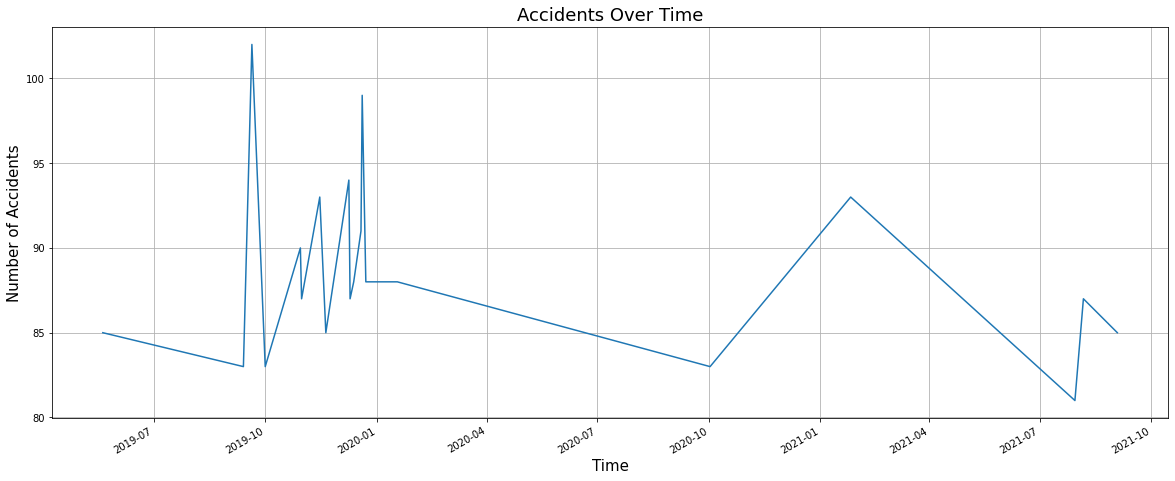

In [40]:
top_20 = accident_data['DateOfCrash'].value_counts()[:20]
top_20.plot(kind='line',figsize=(20,8), grid = True)

plt.title('Accidents Over Time', fontsize = 18)

plt.xlabel('Time', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Over the course of the pandemic, people were driving less due to lockdowns and curfews for resturants. Even today, with work from home mandates, less people are on the roads commuting to work. With these new trends, there have been less accidents since March 2020. Accident rates went up, but now are starting to come back down as more companies send employees home due to omnicron and delta variants. 

Text(0, 0.5, 'Number of Accidents')

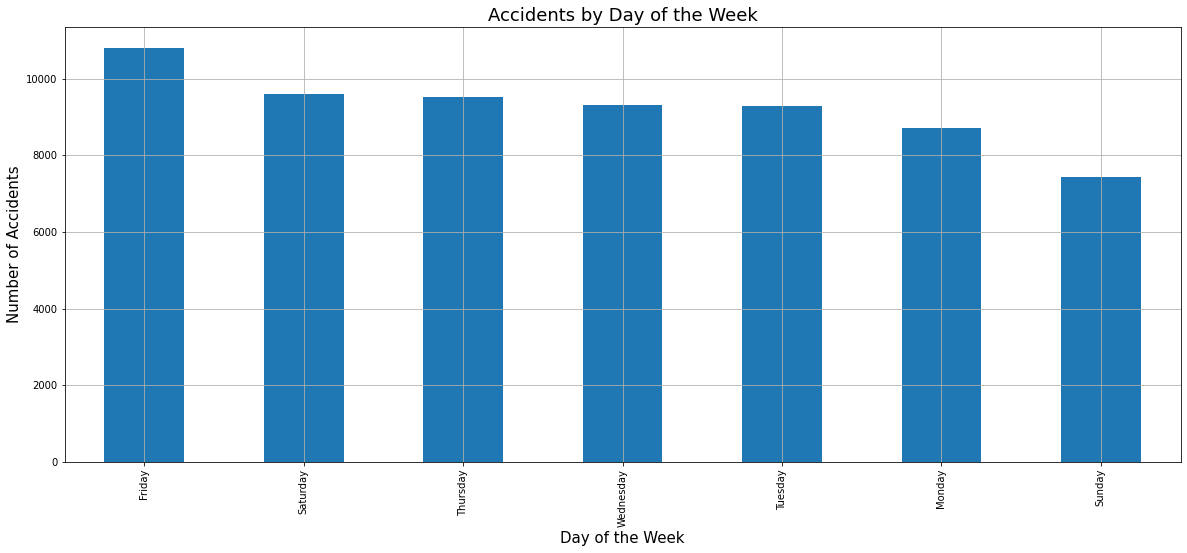

In [41]:
top_20 = accident_data['DayoftheWeekTextFormat'].value_counts()[:20]
top_20.plot(kind='bar',figsize=(20,8), grid = True)

plt.title('Accidents by Day of the Week', fontsize = 18)

plt.xlabel('Day of the Week', fontsize = 15)

plt.ylabel('Number of Accidents', fontsize = 15)

Accidents through the week happen relativly stably, with the most being friday presumabley for weekend travels, and the least being sunday since people tend to stay home with families. 

Text(0, 0.5, 'Number of Accidents')

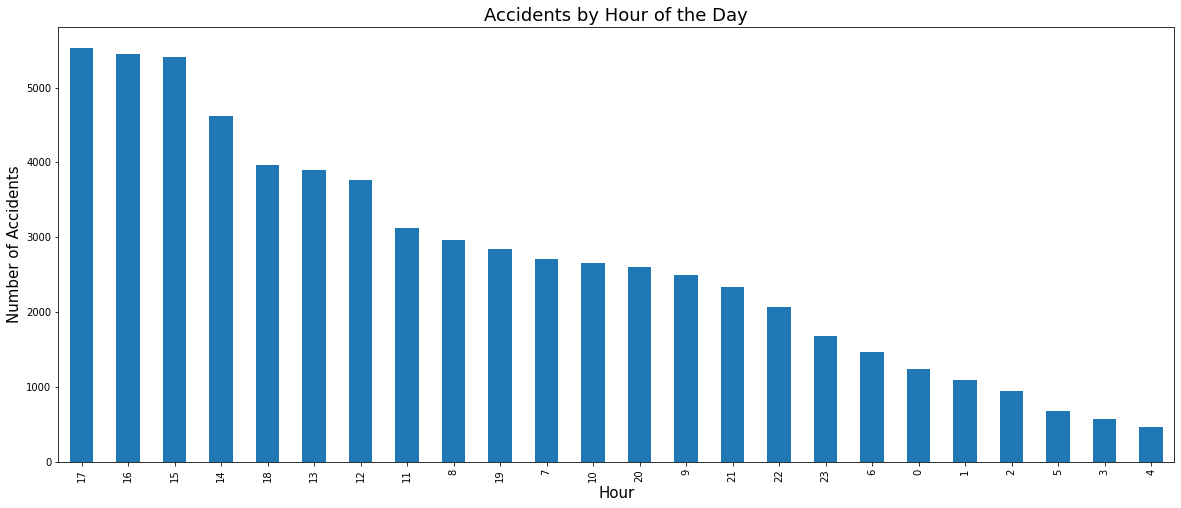

In [42]:
top_20 = accident_data['HouroftheDay'].value_counts()[:24]
top_20.plot(kind='bar',figsize=(20,8))

plt.title('Accidents by Hour of the Day', fontsize = 18)

plt.xlabel('Hour', fontsize = 15)

plt.ylabel('Number of Accidents', fontsize = 15)

Most people are on the roads in the morning trying to get to work, and between 3-5 pm trying to get home. During these hours are the most frequent hours for accidents. 

Text(0, 0.5, 'Number of Accidents')

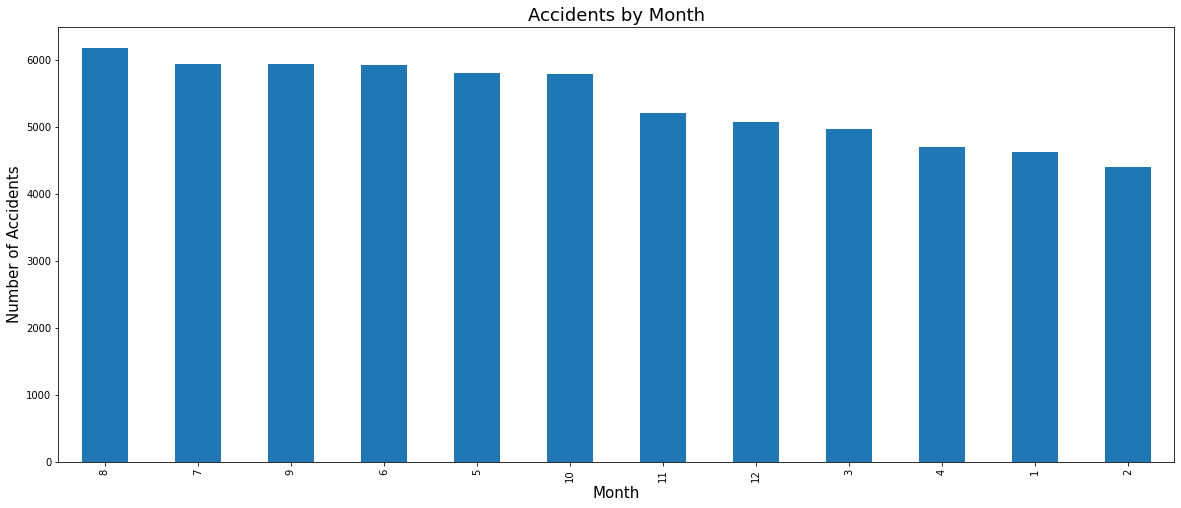

In [43]:
top_20 = accident_data['Month'].value_counts()[:24]
top_20.plot(kind='bar',figsize=(20,8))

plt.title('Accidents by Month', fontsize = 18)

plt.xlabel('Month', fontsize = 15)

plt.ylabel('Number of Accidents', fontsize = 15)

Most accidents happen in the summer months when people start traveling more for fun and least in the coldest months when traveling is not as enjoyable. 

Text(0.5, 1.0, 'Accidents by Car Color')

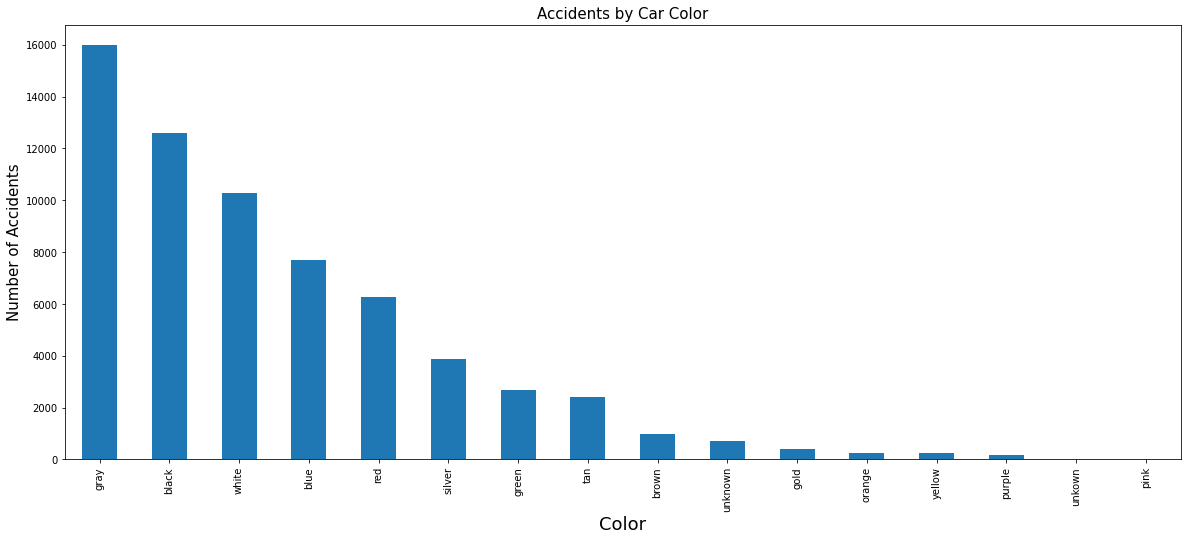

In [45]:
top_20 = accident_data['Color'].value_counts()[:20]
top_20.plot(kind='bar',figsize=(20,8))

plt.title('Accidents by Month', fontsize = 18)

plt.xlabel('Month', fontsize = 15)

plt.ylabel('Number of Accidents', fontsize = 15)

# x axis label
plt.xlabel('Color', fontsize = 18)

# y axis label 
plt.ylabel('Number of Accidents', fontsize = 15)

plt.title('Accidents by Car Color', fontsize = 15)


Most cars that are sold ar usually white, black, white, or blue which make up the majority of car accidnets. Red cars are not the most dangerous color car like the myth says. 

Text(0.5, 1.0, 'Accidents by Severity')

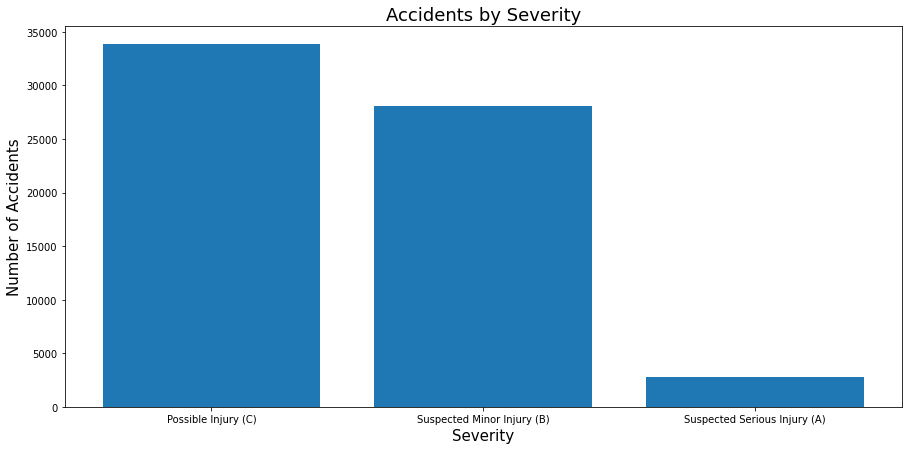

In [46]:
# x - axis severity catergory
x =  accident_data['MostSevereInjuryTextFormat'].unique()

# y - axis - severity count
y = accident_data.groupby(['MostSevereInjuryTextFormat']).count()
y = y['CrashId']

# graph size
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(7)

# graph type bar chart
plt.bar(x,y)

# x axis label
plt.xlabel('Severity', fontsize = 15)

# y axis label
plt.ylabel('Number of Accidents', fontsize = 15)

# title 
plt.title('Accidents by Severity', fontsize = 18)

Most accidents are do not have serious injuries. 

Text(0, 0.5, 'Count of Accidents')

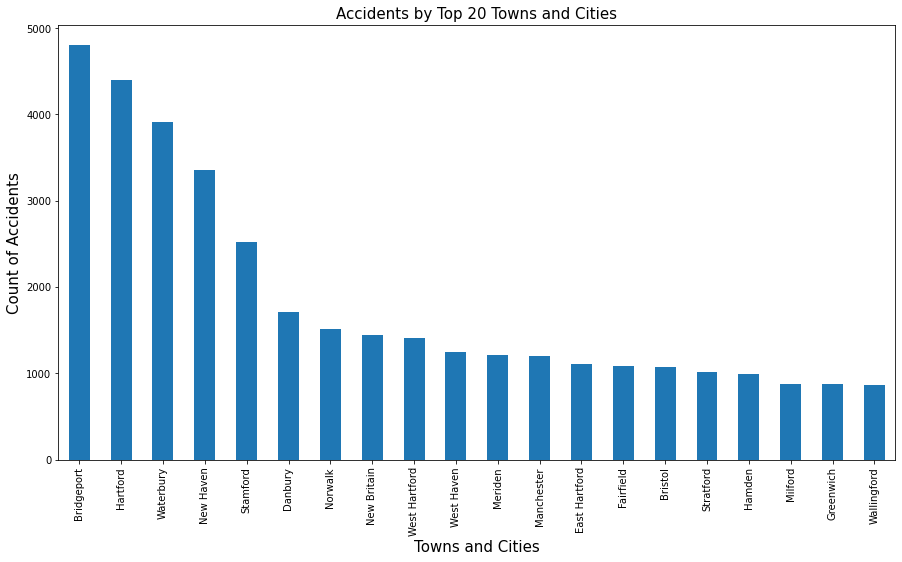

In [47]:
top_20 = accident_data['TownName'].value_counts()[:20]
top_20.plot(kind='bar',figsize=(15,8))

plt.title('Accidents by Top 20 Towns and Cities', fontsize = 15)

plt.xlabel('Towns and Cities', fontsize = 15)

plt.ylabel('Count of Accidents', fontsize = 15)

Most accidents happen in locations with high population density. Notable places where accidents occur are Fairfield, Stratford, Milford, Greenwich, and Stamford. These places have relatively low population counts compared to Waterbury and Hartford but roads are cramped by the shoreline and they make the top 20 list. 

Text(0, 0.5, 'Number of Accidents')

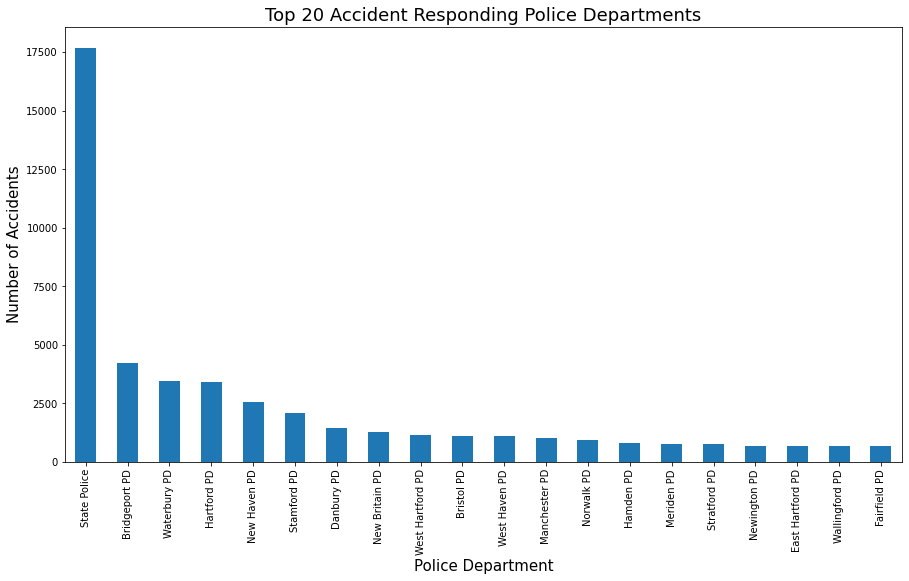

In [48]:
top_20 = accident_data['PoliceAgencyTextFormat'].value_counts()[:20]
top_20.plot(kind='bar',figsize=(15,8))

plt.title('Top 20 Accident Responding Police Departments', fontsize = 18)

plt.xlabel('Police Department', fontsize = 15)

plt.ylabel('Number of Accidents', fontsize = 15)

Most accidents are seen by State Police. 

Text(0, 0.5, 'Number of Accidents')

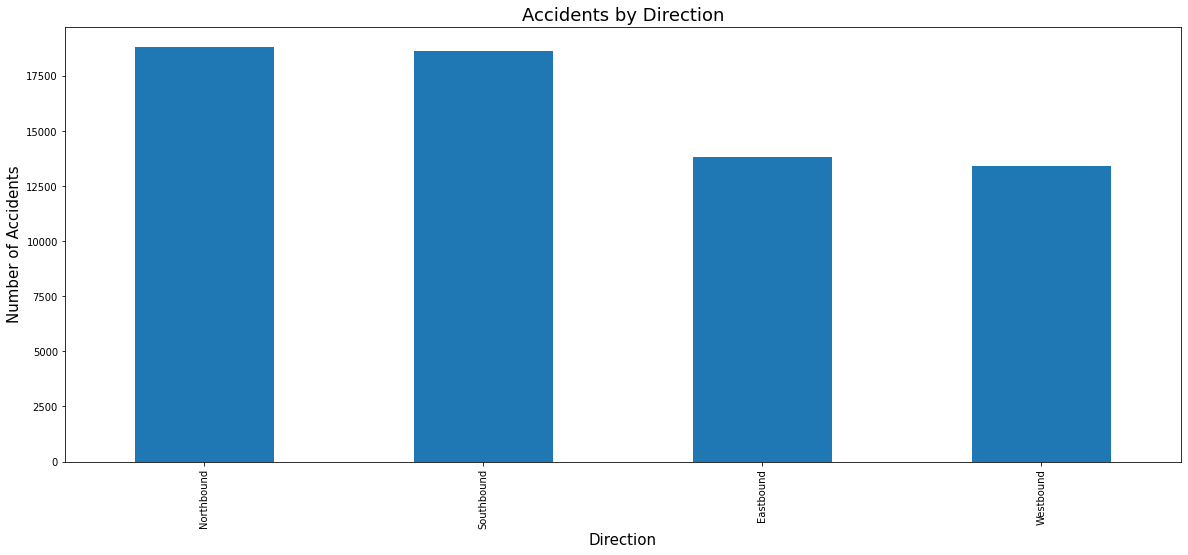

In [68]:
top_20 = accident_data['Direction'].value_counts()[:20]
top_20.plot(kind='bar',figsize=(20,8))

plt.title('Accidents by Direction', fontsize = 18)

plt.xlabel('Direction', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Text(0, 0.5, 'Number of Accidents')

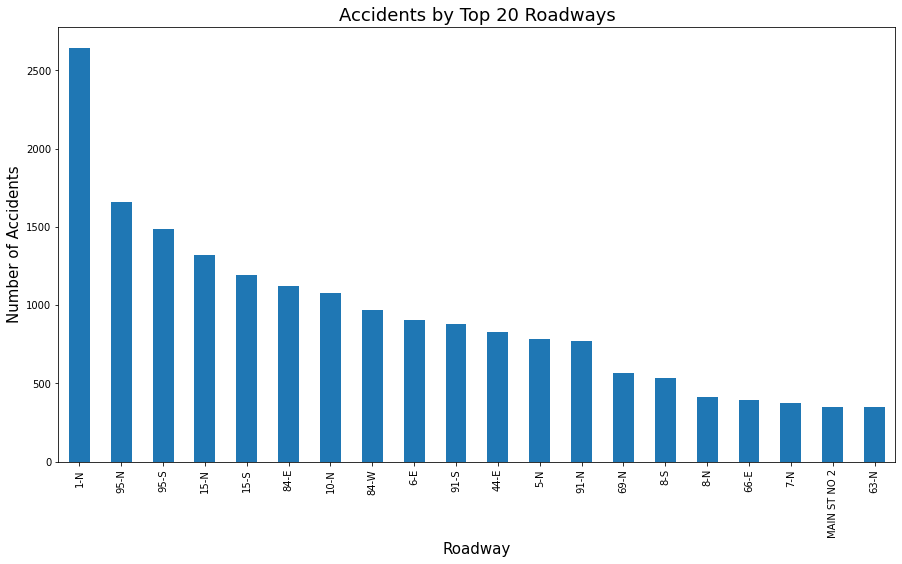

In [59]:
top_20 = accident_data['RoadwayName'].value_counts()[:20]
top_20.plot(kind='bar',figsize=(15,8))

plt.title('Accidents by Top 20 Roadways', fontsize = 18)

plt.xlabel('Roadway', fontsize = 15)

plt.ylabel('Number of Accidents', fontsize = 15)

Most accidents presumably happen on interstates since they move the most people, but in CT 1-N has the most accidents. This is the road that goes from Greenwich to almost Rhode Island. This is why Greenwich and Fairfield make the top 20 list for most accidents. 

Text(0, 0.5, 'Count of Accidents')

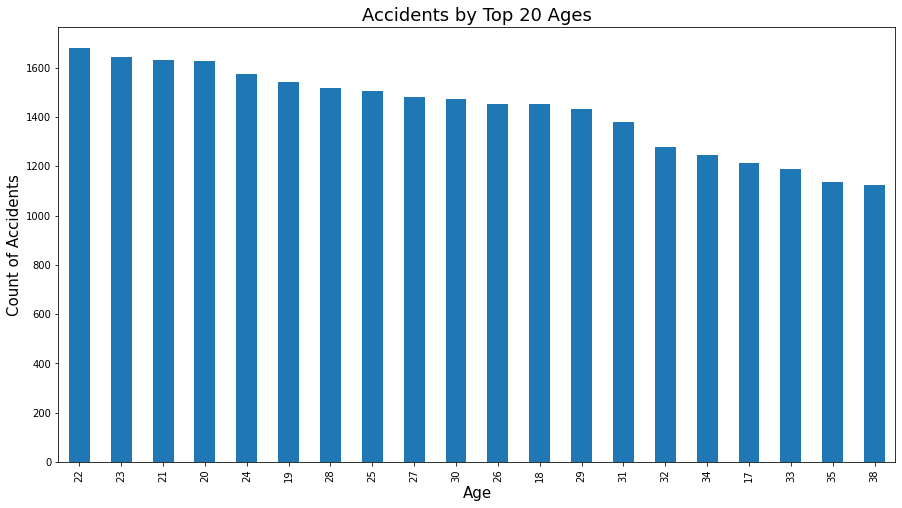

In [50]:
top_20 = accident_data['Age'][accident_data['Age'] != 0].value_counts()[:20]
top_20.plot(kind='bar',figsize=(15,8))

plt.title('Accidents by Top 20 Ages', fontsize = 18)

plt.xlabel('Age', fontsize = 15)

plt.ylabel('Count of Accidents', fontsize = 15)

Most accidents invlove new drivers.

Text(0, 0.5, 'Number of Accidents')

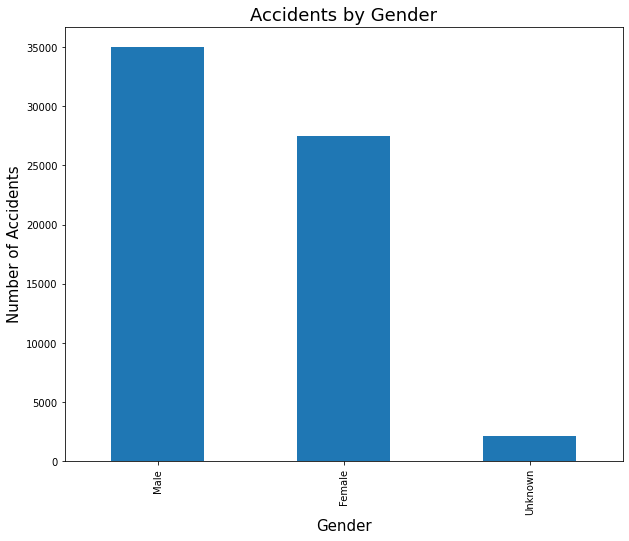

In [51]:
top_20 = accident_data['Gender'].value_counts()[:20]
top_20.plot(kind='bar',figsize=(10,8))

plt.title('Accidents by Gender', fontsize = 18)

plt.xlabel('Gender', fontsize = 15)

plt.ylabel('Number of Accidents', fontsize = 15)

Men cause more accidents than women. 

Text(0, 0.5, 'Number of Accidents')

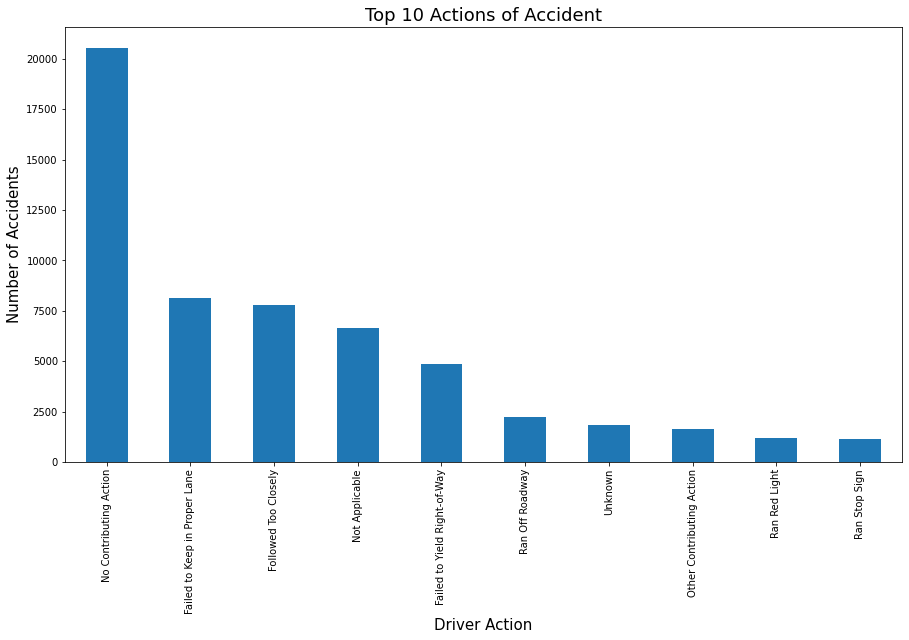

In [52]:
top_20 = accident_data['DriverActions'][accident_data['DriverActions'] != '0'].value_counts()[:10]
top_20.plot(kind='bar',figsize=(15,8))

plt.title('Top 10 Actions of Accident', fontsize = 18)

plt.xlabel('Driver Action', fontsize = 15)

plt.ylabel('Number of Accidents', fontsize = 15)

Most accidents do not have a contributing driver action, but lane drifting and tailgating are primary actions that lead to accidents. 

Text(0, 0.5, 'Number of Accidents')

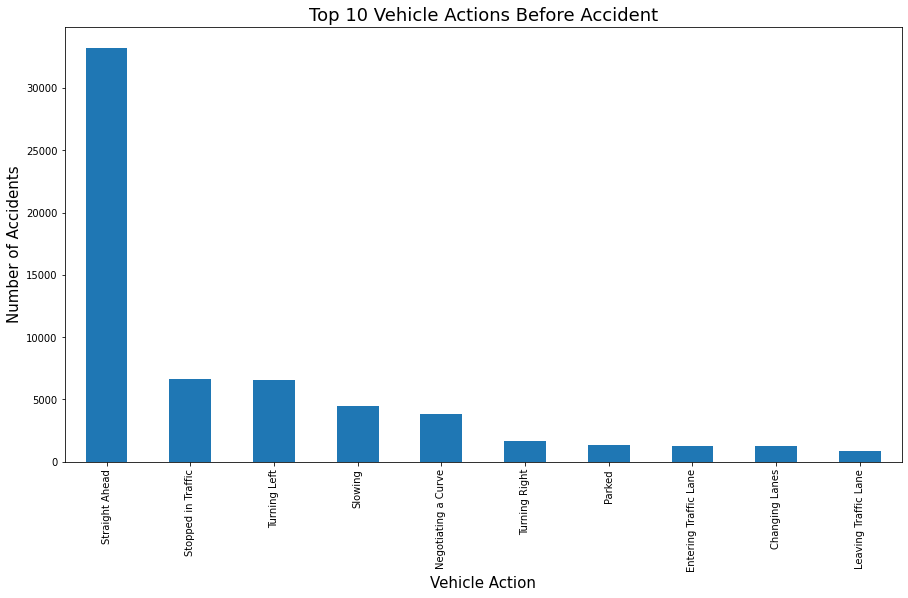

In [53]:
top_20 = accident_data['VehicleManuver'].value_counts()[:10]
top_20.plot(kind='bar',figsize=(15,8))

plt.title('Top 10 Vehicle Actions Before Accident', fontsize = 18)

plt.xlabel('Vehicle Action', fontsize = 15)

plt.ylabel('Number of Accidents', fontsize = 15)

Most cars are moving straight before getting into an accident. A notable event is taking lefts. Taking lefts is more risky than taking rights. 

Text(0, 0.5, 'Number of Accidents')

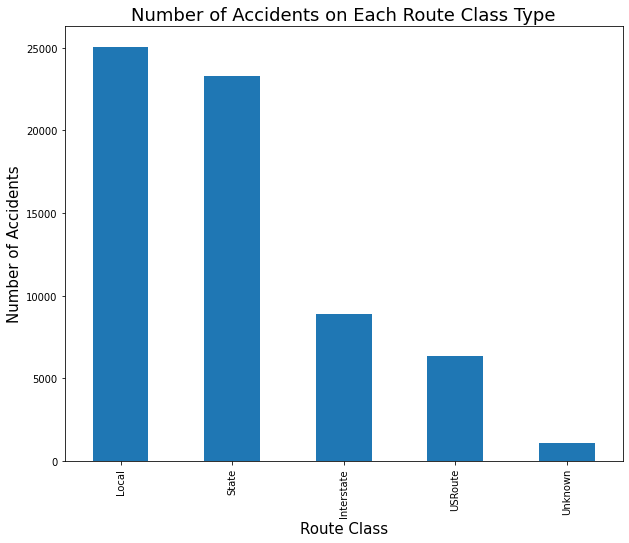

In [54]:
top_20 = accident_data['RouteClassTextFormat'].value_counts()[:10]
top_20.plot(kind='bar',figsize=(10,8))

plt.title('Number of Accidents on Each Route Class Type',fontsize = 18)

plt.xlabel('Route Class',fontsize = 15)

plt.ylabel('Number of Accidents',fontsize = 15)

Based on our results from 1-N, most accidents happen on State or Local roads. Proportianlly, interstates are safer places to drive on. 

Text(0, 0.5, 'Number of Accidents')

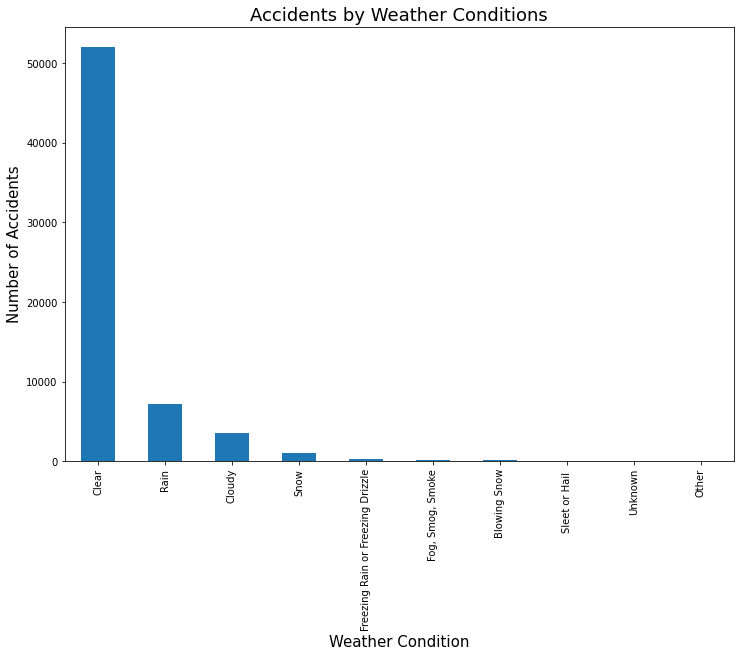

In [55]:
top_20 = accident_data['WeatherConditionTextFormat'].value_counts()[:10]
top_20.plot(kind='bar',figsize=(12,8))

plt.title('Accidents by Weather Conditions', fontsize = 18)

plt.xlabel('Weather Condition', fontsize = 15)

plt.ylabel('Number of Accidents',fontsize = 15)

Weather is usually clear most days so most accidents happen on clear days. 

Text(0, 0.5, 'Number of Accidents')

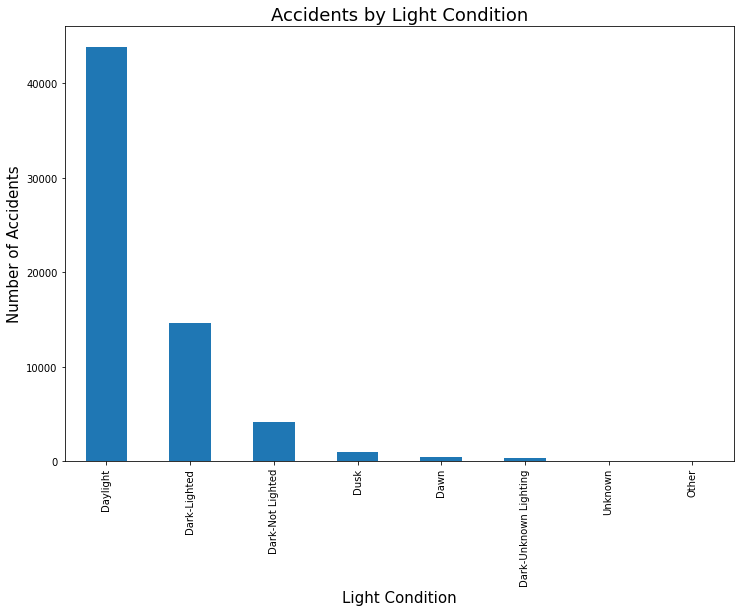

In [56]:
top_20 = accident_data['LightConditionTextFormat'].value_counts()[:10]
top_20.plot(kind='bar',figsize=(12,8))

plt.title('Accidents by Light Condition',fontsize = 18)


plt.xlabel('Light Condition',fontsize = 15)

plt.ylabel('Number of Accidents',fontsize = 15)

Most people travel during the day to get to and from work, so most accidents happen during daylight. It is interesting that less accidents happen on nonlighted roads than lighted roads. With that being said, most roads are lighted.

Text(0, 0.5, 'Count of Accidents')

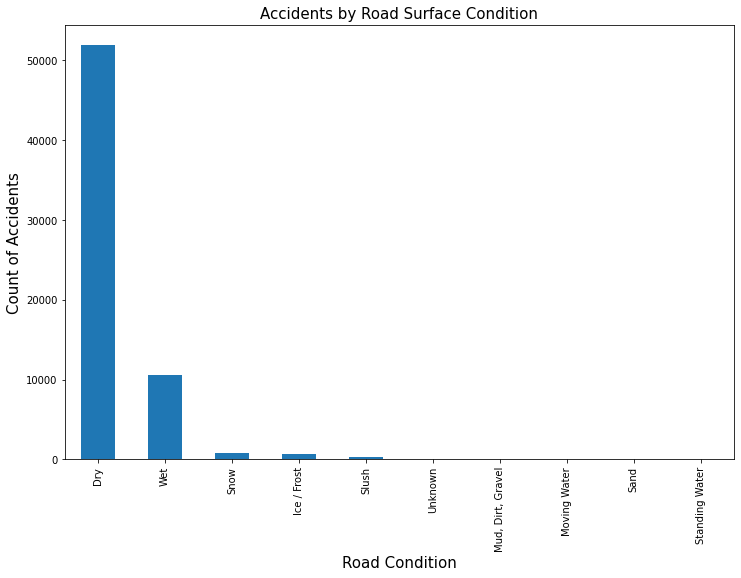

In [57]:
top_20 = accident_data['RoadSurfaceConditionTextFormat'].value_counts()[:10]
top_20.plot(kind='bar',figsize=(12,8))

plt.title('Accidents by Road Surface Condition',fontsize = 15)

plt.xlabel('Road Condition',fontsize = 15)

plt.ylabel('Count of Accidents',fontsize = 15)

Driviing conditions are usually dry so most accidents happen when it is dry. 

Text(0, 0.5, 'Count of Accidents')

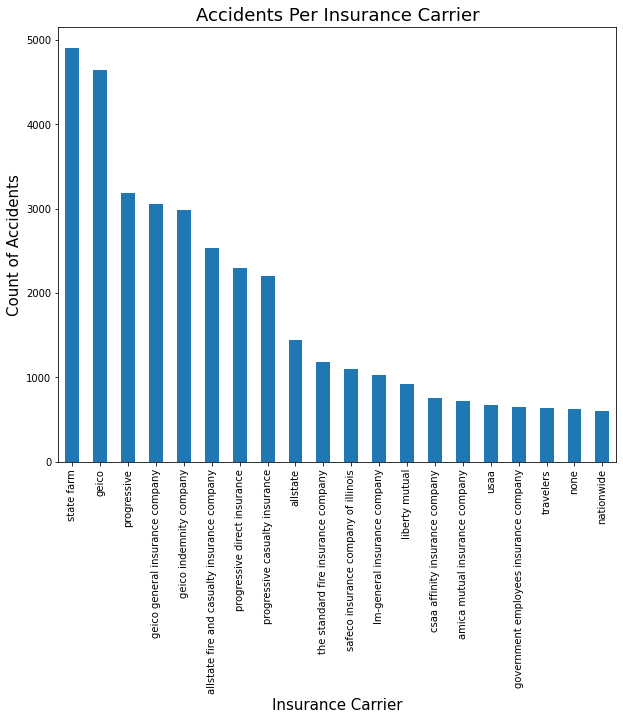

In [58]:
top_20 = accident_data['InsuranceCarrier'][accident_data['InsuranceCarrier'] != '0'].value_counts()[:20]
top_20.plot(kind='bar',figsize=(10,8))

plt.title('Accidents Per Insurance Carrier',fontsize = 18)

plt.xlabel('Insurance Carrier',fontsize = 15)

plt.ylabel('Count of Accidents',fontsize = 15)

# Analysis by Severity

Text(0, 0.5, 'Number of Accidents')

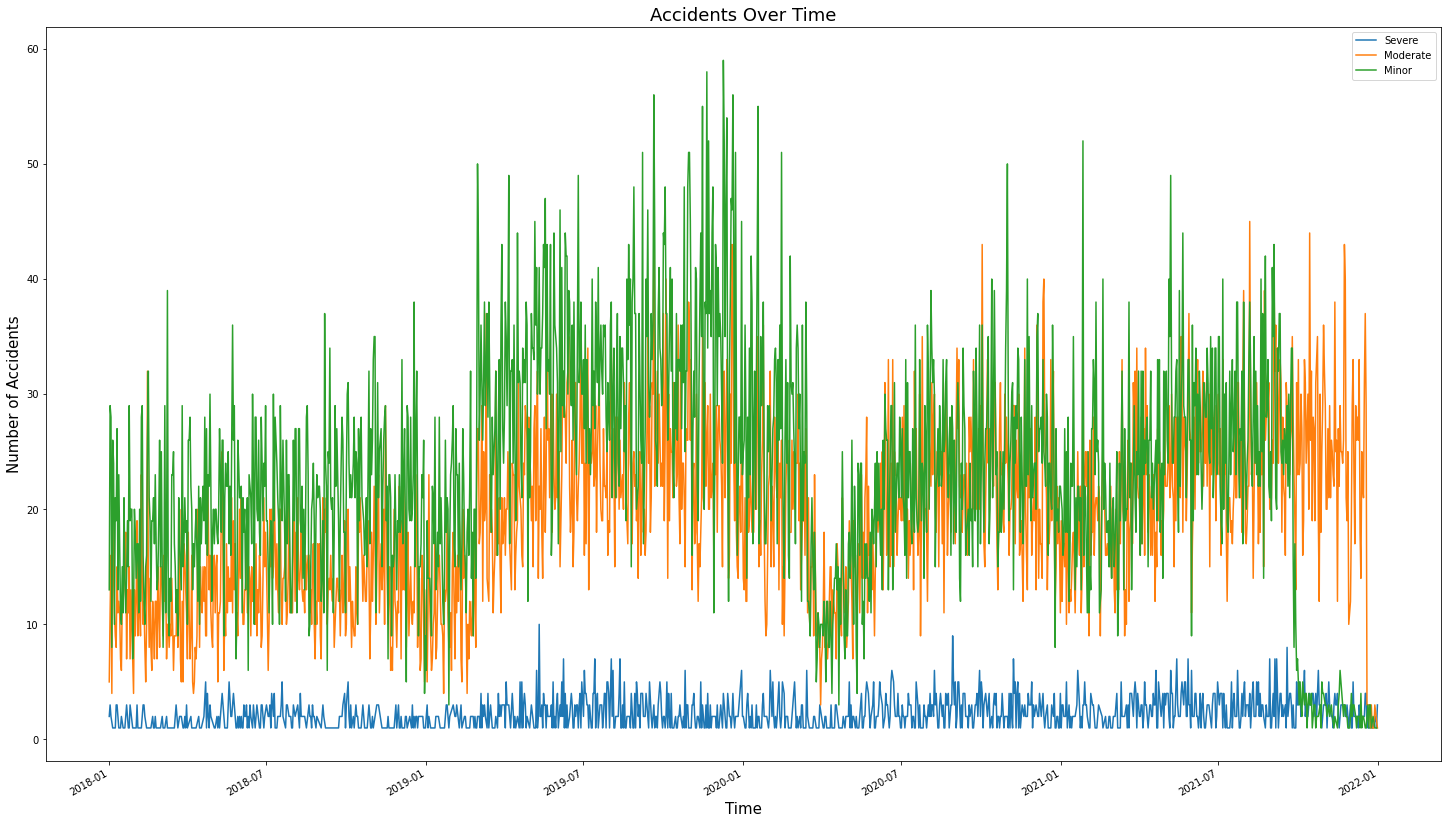

In [ ]:
accident_data['DateOfCrash'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].value_counts().plot(kind='line',figsize=(25,15), grid = True,label="Severe")
accident_data['DateOfCrash'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Minor Injury (B)'].value_counts().plot(label="Moderate")
accident_data['DateOfCrash'][accident_data['MostSevereInjuryTextFormat'] == 'Possible Injury (C)'].value_counts().plot(label="Minor")

plt.legend()


plt.title('Accidents Over Time', fontsize = 18)

plt.xlabel('Time', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

The pandemic caused driving to decrease because of lockdowns and early curfews so naturally, accidents also dropped during this time. Before the pandemic minor accidents were on the rise. Severe accidents seem rather steady in any climate. 

Male       0.632838
Female     0.342153
Unknown    0.025009
Name: Gender, dtype: float64


Text(0, 0.5, 'Number of Accidents')

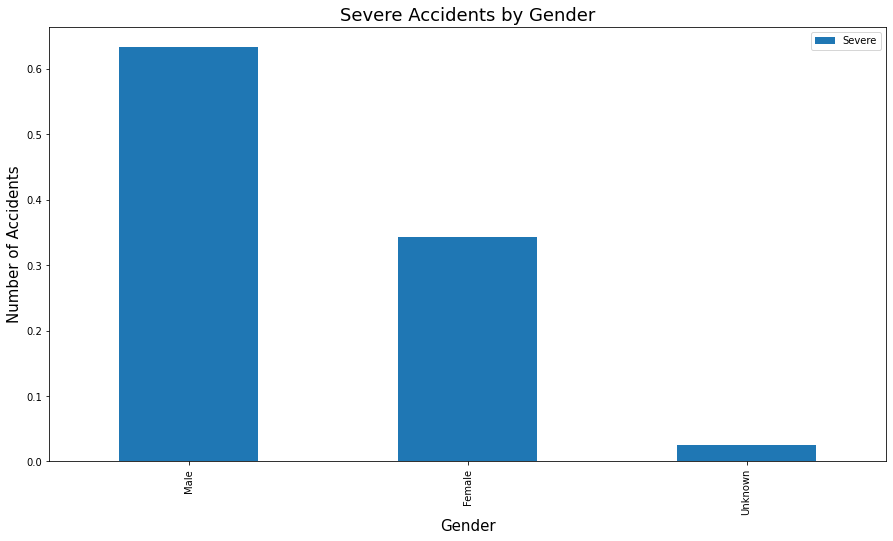

In [ ]:
a = accident_data['Gender'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].value_counts()/accident_data['Gender'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].count()
a.plot(kind='bar',figsize=(15,8) ,label="Severe")
print(a)
plt.legend()


plt.title('Severe Accidents by Gender', fontsize = 18)

plt.xlabel('Gender', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Male       0.55506
Female     0.41585
Unknown    0.02909
Name: Gender, dtype: float64


Text(0, 0.5, 'Number of Accidents')

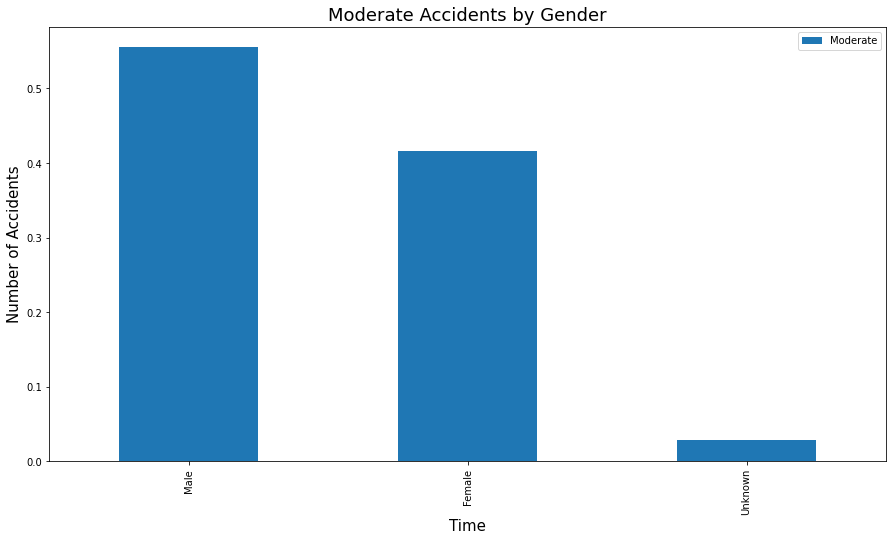

In [75]:
b = accident_data['Gender'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Minor Injury (B)'].value_counts()/accident_data['Gender'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Minor Injury (B)'].count()
print(b)
b.plot(kind='bar',label="Moderate", figsize=(15,8))
plt.legend()


plt.title('Moderate Accidents by Gender', fontsize = 18)

plt.xlabel('Time', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Male       0.522382
Female     0.440276
Unknown    0.037343
Name: Gender, dtype: float64


Text(0, 0.5, 'Number of Accidents')

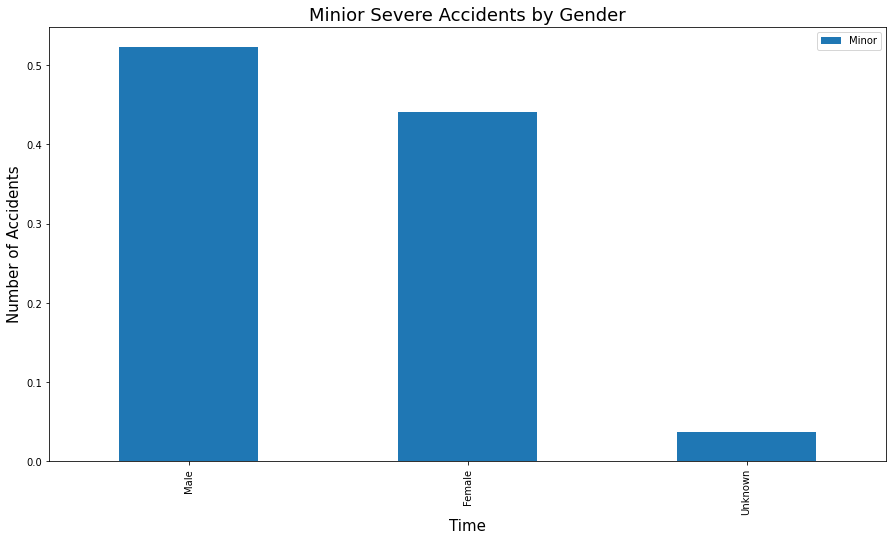

In [74]:
c = accident_data['Gender'][accident_data['MostSevereInjuryTextFormat'] == 'Possible Injury (C)'].value_counts()/accident_data['Gender'][accident_data['MostSevereInjuryTextFormat'] == 'Possible Injury (C)'].count()
print(c)
c.plot(kind='bar',label="Minor", figsize = (15,8))

plt.legend()


plt.title('Minior Severe Accidents by Gender', fontsize = 18)

plt.xlabel('Time', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Men get into more accidents than women, so the proportion of male accidents in higher in every catergory but men are in severe accidents about twice more as women. The moderate and minor catergory are about even. 

Text(0, 0.5, 'Number of Accidents')

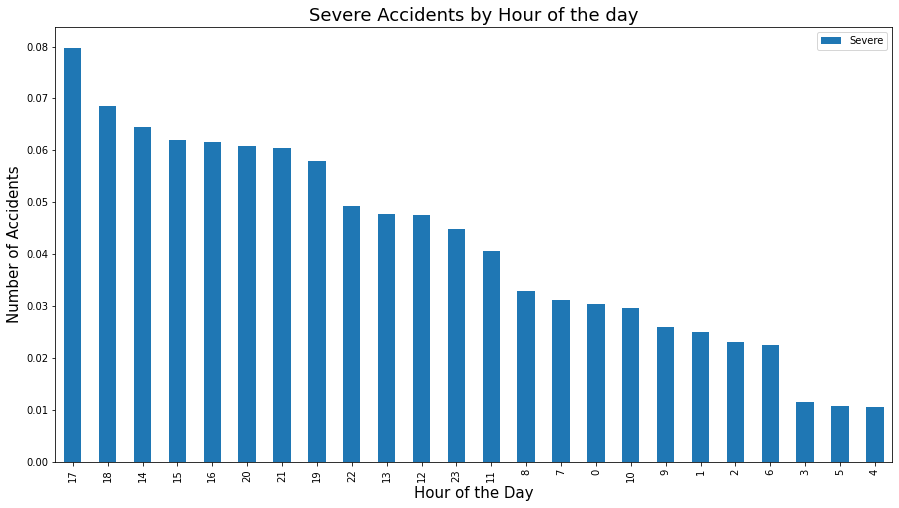

In [ ]:
a = accident_data['HouroftheDay'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].value_counts()/accident_data['HouroftheDay'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].count()
a.plot(kind='bar',figsize=(15,8) ,label="Severe")

plt.legend()


plt.title('Severe Accidents by Hour of the day', fontsize = 18)

plt.xlabel('Hour of the Day', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Text(0, 0.5, 'Number of Accidents')

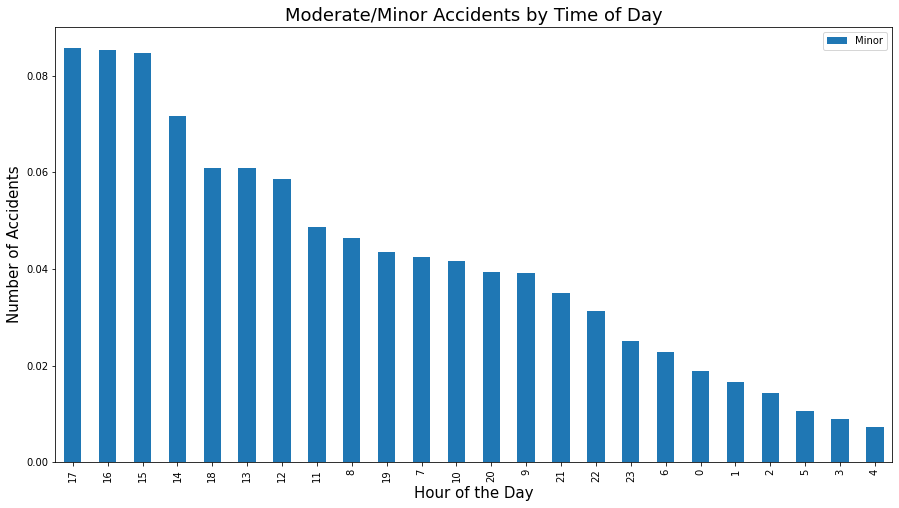

In [ ]:
c = accident_data['HouroftheDay'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].value_counts()/accident_data['HouroftheDay'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].count()

c.plot(kind='bar',label="Minor", figsize = (15,8))

plt.legend()


plt.title('Moderate/Minor Accidents by Time of Day', fontsize = 18)

plt.xlabel('Hour of the Day', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Most severe accidents happen during rush hour but also happen more frequently late at night compared to regular accidents. 

Text(0, 0.5, 'Number of Accidents')

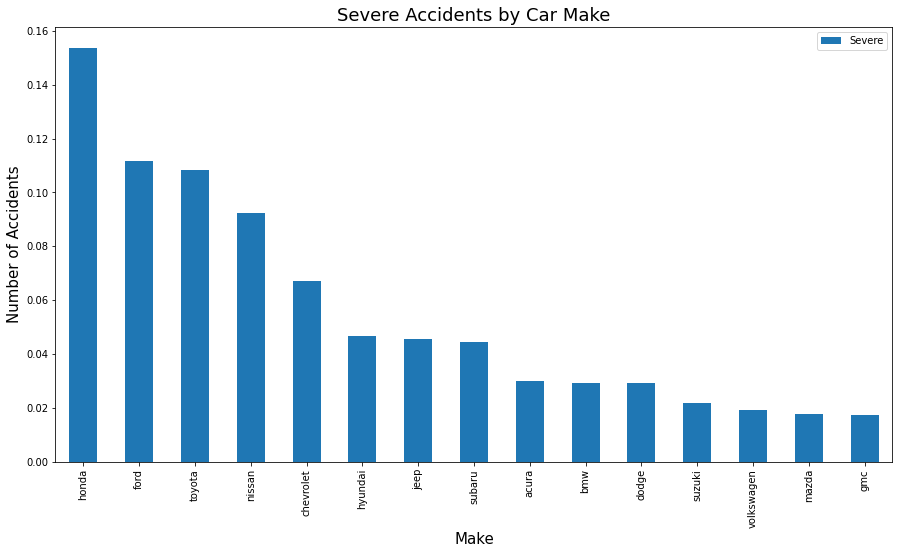

In [ ]:
a = accident_data['Make'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['Make'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].count()
a.plot(kind='bar',figsize=(15,8) ,label="Severe")

plt.legend()


plt.title('Severe Accidents by Car Make', fontsize = 18)

plt.xlabel('Make', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Text(0, 0.5, 'Number of Accidents')

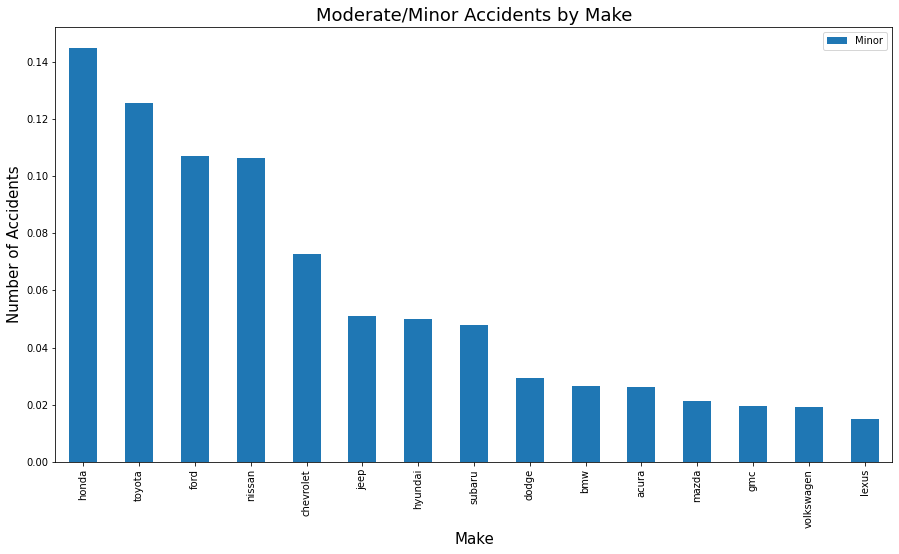

In [ ]:
c = accident_data['Make'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['Make'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].count()

c.plot(kind='bar',label="Minor", figsize = (15,8))

plt.legend()


plt.title('Moderate/Minor Accidents by Make', fontsize = 18)

plt.xlabel('Make', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Severe accidents are have the same make spread as moderate/minor accidents but are primarily caused by Hondas. 

Text(0, 0.5, 'Number of Accidents')

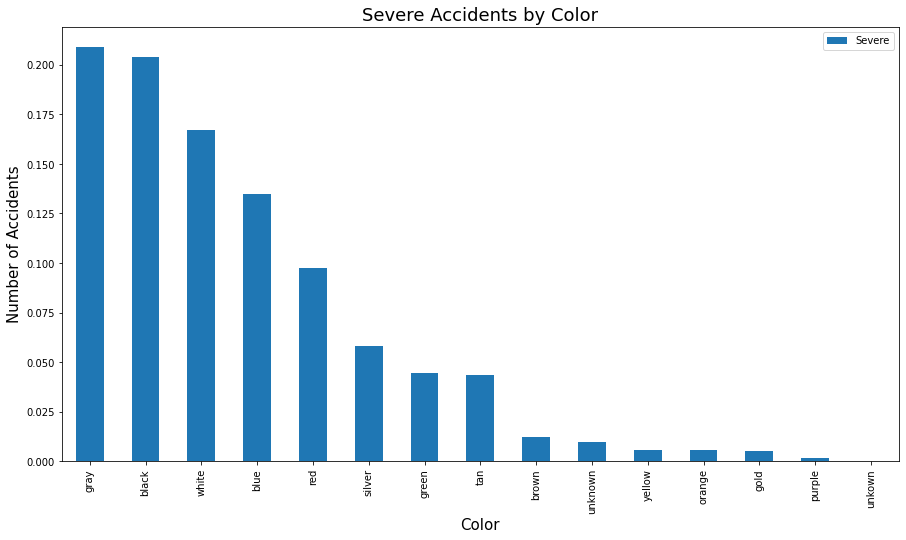

In [ ]:
a = accident_data['Color'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['Color'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].count()
a.plot(kind='bar',figsize=(15,8) ,label="Severe")

plt.legend()


plt.title('Severe Accidents by Color', fontsize = 18)

plt.xlabel('Color', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Text(0, 0.5, 'Number of Accidents')

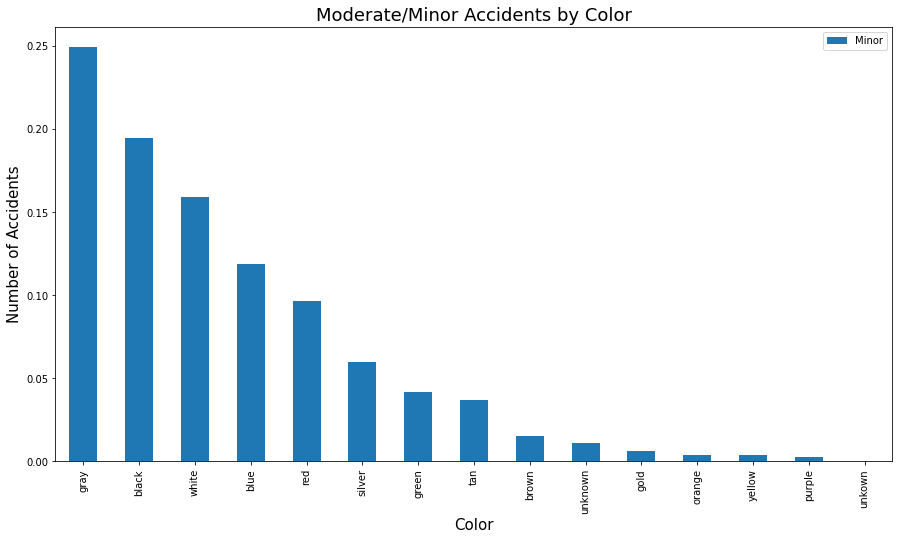

In [ ]:
c = accident_data['Color'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['Color'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].count()

c.plot(kind='bar',label="Minor", figsize = (15,8))

plt.legend()


plt.title('Moderate/Minor Accidents by Color', fontsize = 18)

plt.xlabel('Color', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

There are no car color differences between regular accidents and severe accidents. 

In [76]:
accident_data.head()

,CrashId,Latitude,Longitude,Make,ModelYear,Model,Color,Age,Gender,EjectionStatus,DriverActions,DOTCaseNumber,Direction,VehicleManuver,InvalidResistration,MissingResistration,InsuranceExpirationDate,TownName,DateOfCrash,Year,Month,Day,DayoftheWeekTextFormat,HouroftheDay,MostSevereInjuryTextFormat,NumberOfMotorVehicles,NumberOfNon-Motorist,NumberOfWitnesses,RouteClassTextFormat,RoadwayName,FirstHarmfulEventTextFormat,MannerofCrash/CollisionImpactTextFormat,LocationofFirstHarmfulEventTextFormat,WeatherConditionTextFormat,LightConditionTextFormat,RoadSurfaceConditionTextFormat,CrashSpecificLocationTextFormat,TypeofIntersectionTextFormat,PoliceAgencyTextFormat,InsuranceCarrier,ExpiredInsurance
0,614657,41.954014,-72.182635,volkswagen,2008,jetta,white,23,Female,Not Ejected,Failed to Keep in Proper Lane,3036356,Eastbound,Negotiating a Curve,false,false,2000-01-01,Ashford,2019-02-25,2019,2,25,Monday,7,Possible Injury (C),1,0,0,Local,HILLSIDE RD,Utility Pole/Light Support,Not Applicable,Roadside,Clear,Daylight,Snow,Non-Junction,Not at Intersection,State Police,govt employee ins,Yes
1,614660,41.895795,-72.039451,chevrolet,2008,silverado k2500hd,red,28,Male,Not Ejected,Not Applicable,3038517,Eastbound,Negotiating a Curve,false,false,2000-01-01,Pomfret,2019-02-25,2019,2,25,Monday,7,Suspected Minor Injury (B),1,0,0,State,244-E,Utility Pole/Light Support,Not Applicable,Roadside,Clear,Daylight,Ice / Frost,Non-Junction,Not at Intersection,State Police,united ohio insurance,Yes
2,614678,41.592954,-71.969883,ford,1988,mustang lx,blue,43,Female,Not Ejected,No Contributing Action,3038711,Eastbound,Slowing,false,false,2000-01-01,Griswold,2019-02-25,2019,2,25,Monday,14,Possible Injury (C),2,0,0,State,138-E,Motor Vehicle in Operation,Front to rear,On Roadway,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,geico general insurance company,Yes
3,614680,41.563682,-73.057802,honda,2004,accord lx,tan,33,Female,Not Ejected,Over-Correcting/Over-Steering,3036211,Northbound,Other,false,false,2000-01-01,Waterbury,2019-02-25,2019,2,25,Monday,14,Suspected Minor Injury (B),1,0,0,State,8-N,Concrete Traffic Barrier,Not Applicable,Shoulder,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,state farm,Yes
4,614681,41.998752,-71.852445,hyundai,2010,elantra blue/gls/se,blue,39,Female,Not Ejected,Ran Off Roadway,3036731,Northbound,Changing Lanes,false,false,2000-01-01,Thompson,2019-02-25,2019,2,25,Monday,15,Possible Injury (C),1,0,0,Interstate,395-N,Guardrail Face,Not Applicable,On Roadway,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,metropolitan group property and casualty insur...,Yes


Text(0, 0.5, 'Number of Accidents')

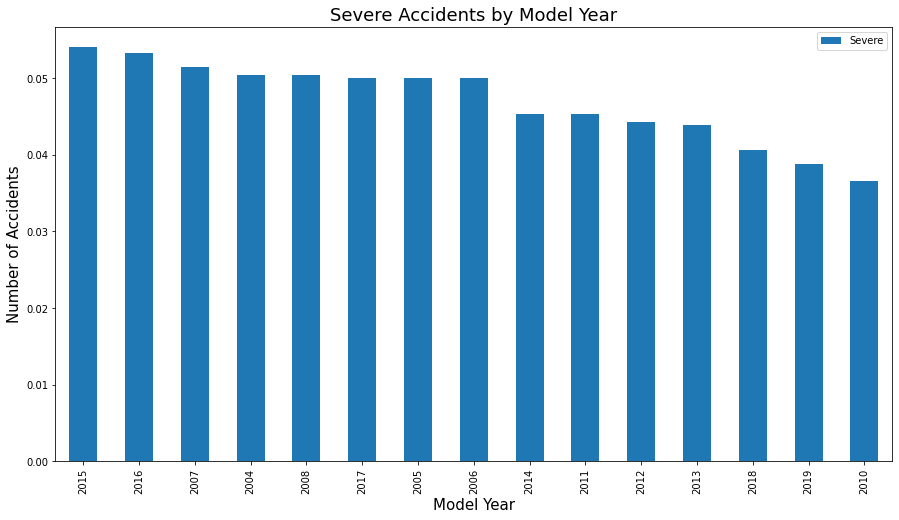

In [81]:
a = accident_data['ModelYear'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['ModelYear'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].count()
a.plot(kind='bar',figsize=(15,8) ,label="Severe")

plt.legend()


plt.title('Severe Accidents by Model Year', fontsize = 18)

plt.xlabel('Model Year', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Text(0, 0.5, 'Number of Accidents')

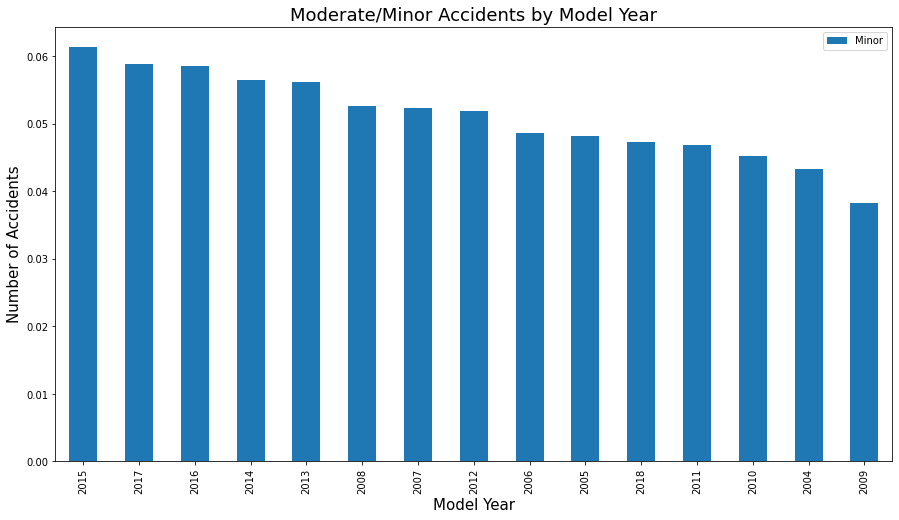

In [82]:
c = accident_data['ModelYear'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['ModelYear'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].count()

c.plot(kind='bar',label="Minor", figsize = (15,8))

plt.legend()


plt.title('Moderate/Minor Accidents by Model Year', fontsize = 18)

plt.xlabel('Model Year', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Text(0, 0.5, 'Number of Accidents')

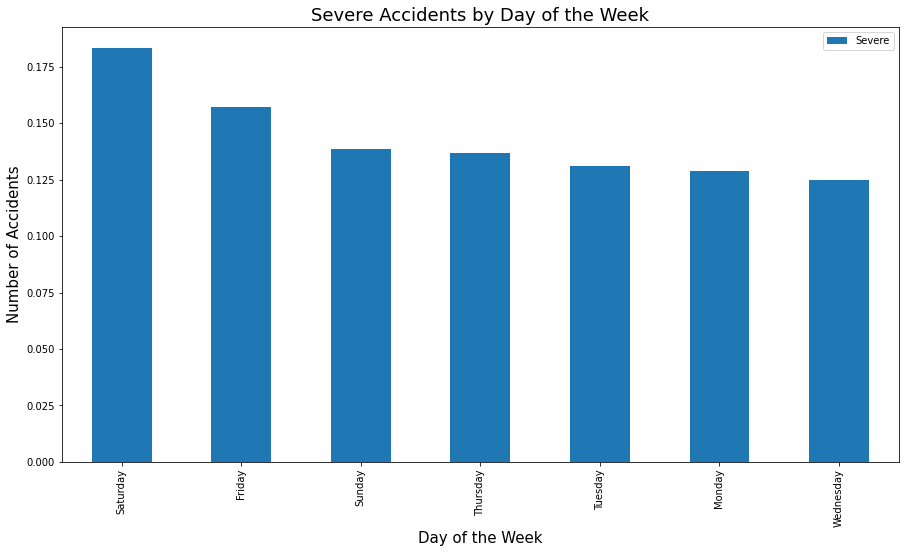

In [ ]:
a = accident_data['DayoftheWeekTextFormat'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['DayoftheWeekTextFormat'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].count()
a.plot(kind='bar',figsize=(15,8) ,label="Severe")

plt.legend()


plt.title('Severe Accidents by Day of the Week', fontsize = 18)

plt.xlabel('Day of the Week', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Text(0, 0.5, 'Number of Accidents')

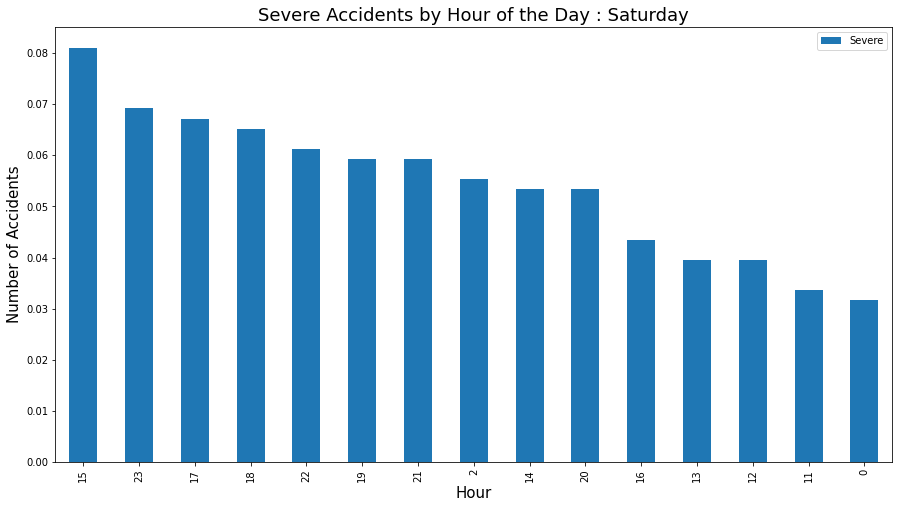

In [ ]:
a = accident_data['HouroftheDay'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'][ accident_data['DayoftheWeekTextFormat'] == 'Saturday'].value_counts()[:15]/accident_data['HouroftheDay'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'][ accident_data['DayoftheWeekTextFormat'] == 'Saturday'].count()
a.plot(kind='bar',figsize=(15,8) ,label="Severe")

plt.legend()


plt.title('Severe Accidents by Hour of the Day : Saturday', fontsize = 18)

plt.xlabel('Hour', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Text(0, 0.5, 'Number of Accidents')

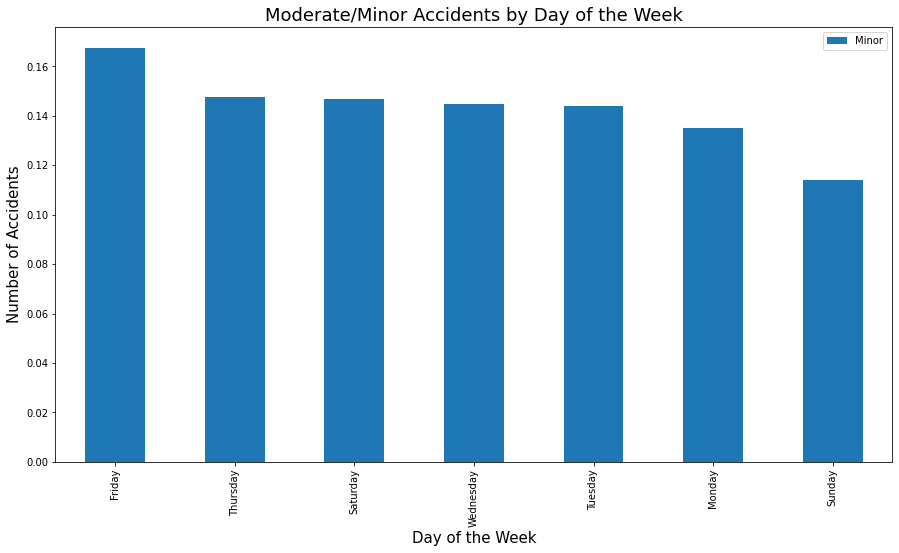

In [ ]:
c = accident_data['DayoftheWeekTextFormat'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['DayoftheWeekTextFormat'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].count()

c.plot(kind='bar',label="Minor", figsize = (15,8))

plt.legend()


plt.title('Moderate/Minor Accidents by Day of the Week', fontsize = 18)

plt.xlabel('Day of the Week', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Most severe accidents happen on weekends while regular accidents usually occur during the week. Sunday is the day with least overall accidents, and Saturday is 3rd overall but first for severe accidents. Time of day is somewhat indiciatve of the reason why severe accidents happen on weekends. 

Text(0, 0.5, 'Number of Accidents')

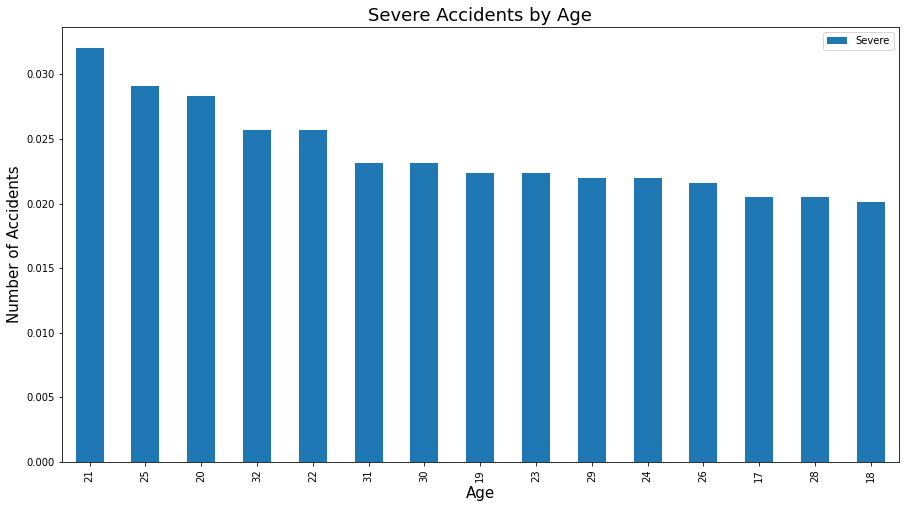

In [ ]:
a = accident_data['Age'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'][accident_data['Age'] != 0].value_counts()[:15]/accident_data['Age'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'][accident_data['Age'] != 0].count()
a.plot(kind='bar',figsize=(15,8) ,label="Severe")

plt.legend()


plt.title('Severe Accidents by Age', fontsize = 18)

plt.xlabel('Age', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Text(0, 0.5, 'Number of Accidents')

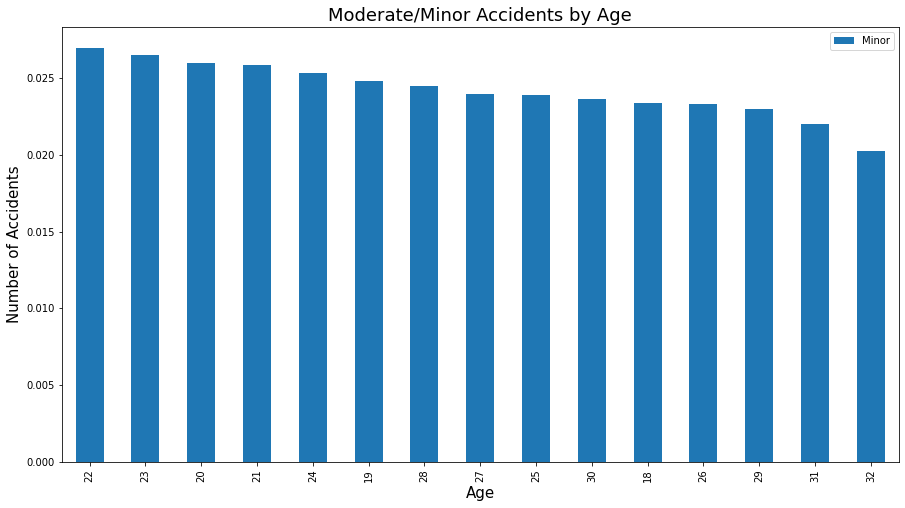

In [ ]:
c = accident_data['Age'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'][accident_data['Age'] != 0].value_counts()[:15]/accident_data['Age'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'][accident_data['Age'] != 0].count()

c.plot(kind='bar',label="Minor", figsize = (15,8))

plt.legend()


plt.title('Moderate/Minor Accidents by Age', fontsize = 18)

plt.xlabel('Age', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Age does matter for accident severity. 21, 25, 20, 32 year olds cause most severe accidents which does not align with regular accidents. 

Text(0, 0.5, 'Number of Accidents')

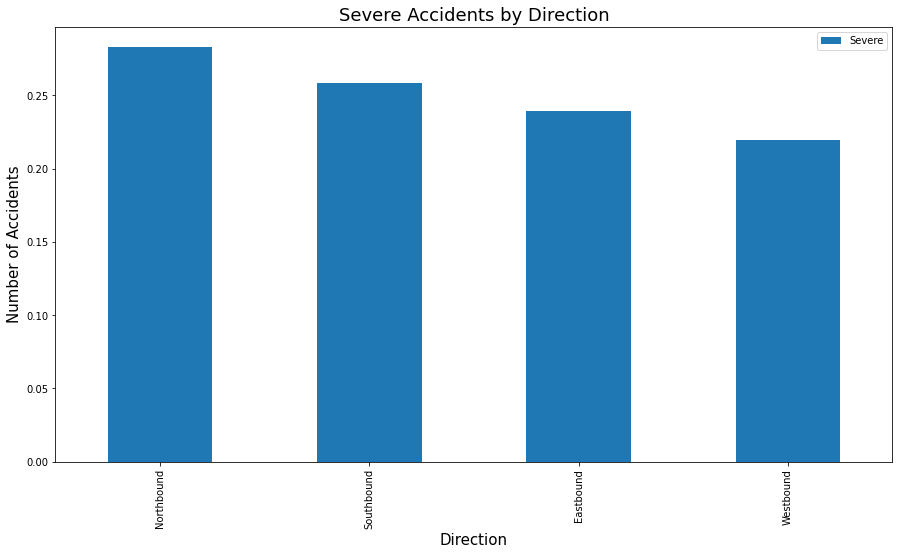

In [72]:
a = accident_data['Direction'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['Direction'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].count()
a.plot(kind='bar',figsize=(15,8) ,label="Severe")

plt.legend()


plt.title('Severe Accidents by Direction', fontsize = 18)

plt.xlabel('Direction', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Text(0, 0.5, 'Number of Accidents')

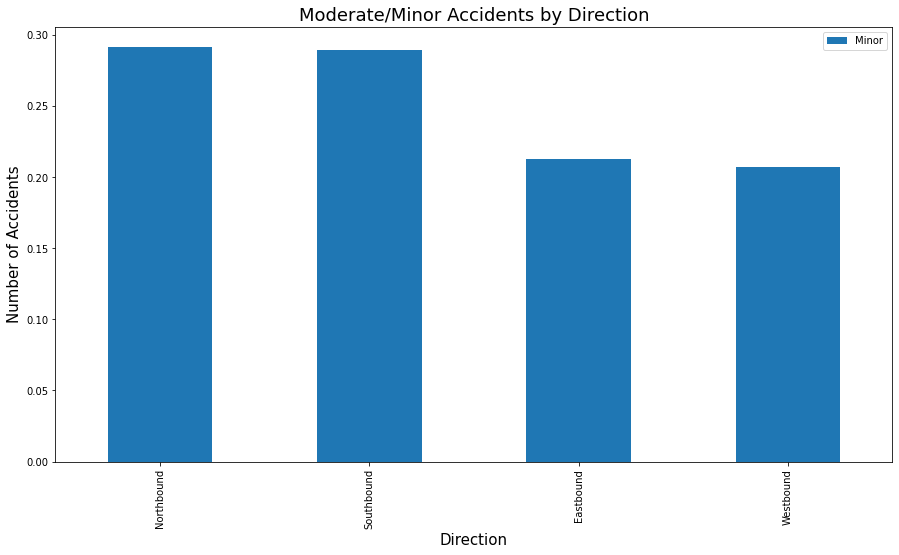

In [73]:
c = accident_data['Direction'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['Direction'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].count()

c.plot(kind='bar',label="Minor", figsize = (15,8))

plt.legend()


plt.title('Moderate/Minor Accidents by Direction', fontsize = 18)

plt.xlabel('Direction', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Text(0, 0.5, 'Number of Accidents')

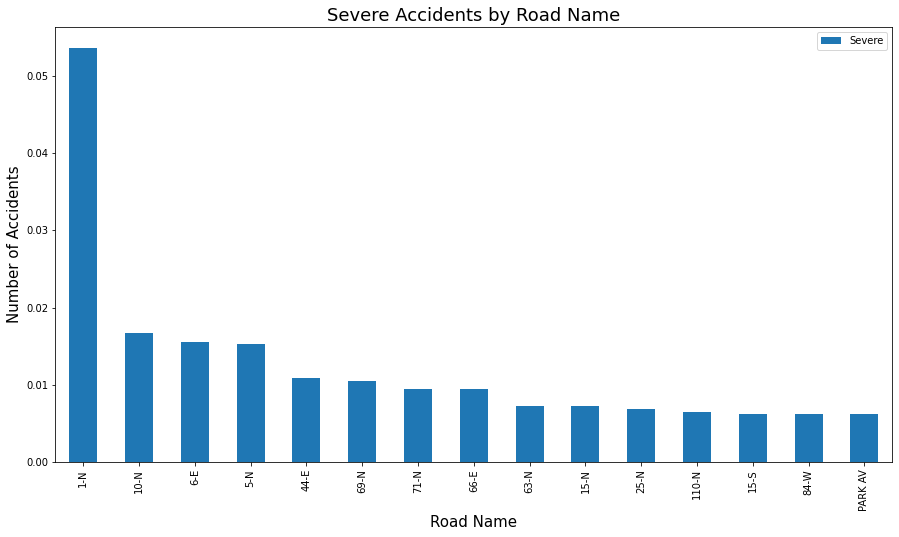

In [ ]:
a = accident_data['RoadwayName'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['RoadwayName'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].count()
a.plot(kind='bar',figsize=(15,8) ,label="Severe")

plt.legend()


plt.title('Severe Accidents by Road Name', fontsize = 18)

plt.xlabel('Road Name', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Text(0, 0.5, 'Number of Accidents')

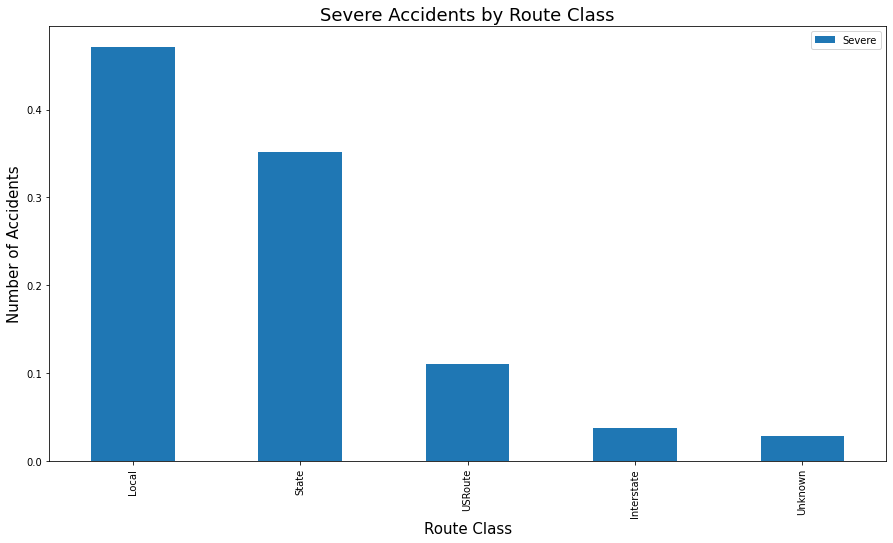

In [ ]:
a = accident_data['RouteClassTextFormat'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['RouteClassTextFormat'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].count()
a.plot(kind='bar',figsize=(15,8) ,label="Severe")

plt.legend()


plt.title('Severe Accidents by Route Class', fontsize = 18)

plt.xlabel('Route Class', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Text(0, 0.5, 'Number of Accidents')

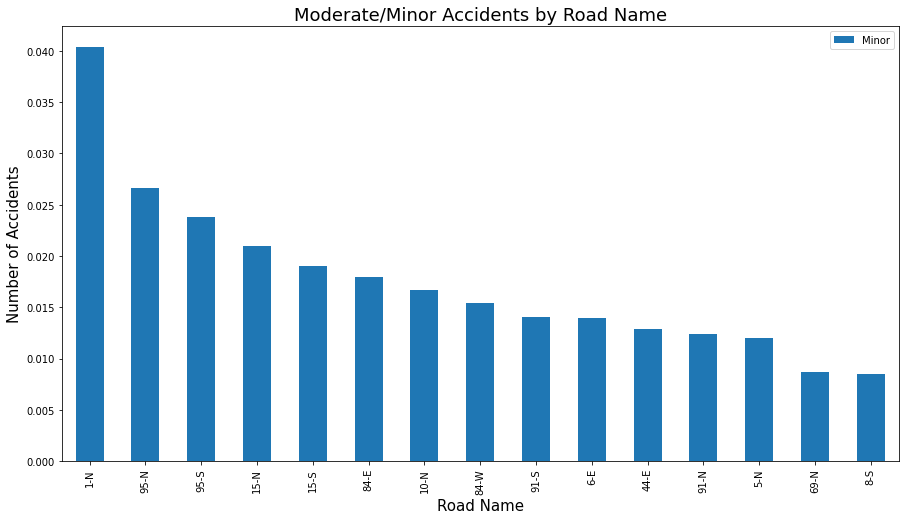

In [ ]:
c = accident_data['RoadwayName'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['RoadwayName'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].count()

c.plot(kind='bar',label="Minor", figsize = (15,8))

plt.legend()


plt.title('Moderate/Minor Accidents by Road Name', fontsize = 18)

plt.xlabel('Road Name', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Text(0, 0.5, 'Number of Accidents')

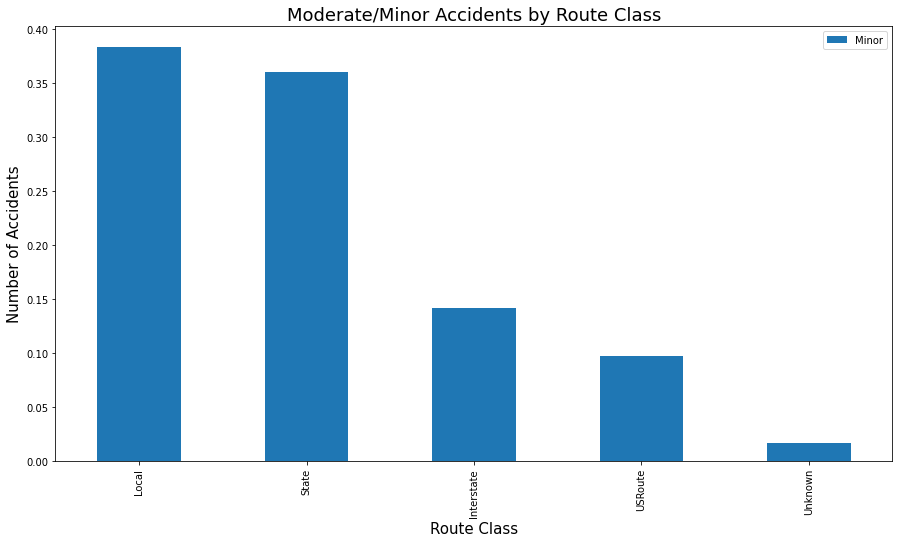

In [ ]:
c = accident_data['RouteClassTextFormat'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['RouteClassTextFormat'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].count()

c.plot(kind='bar',label="Minor", figsize = (15,8))

plt.legend()


plt.title('Moderate/Minor Accidents by Route Class', fontsize = 18)

plt.xlabel('Route Class', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Just like regular accidents, most severe accidents happen on local and state roads but severe accidents are less likely to happen on interstates and more likely to happen on US routes. The vast majority of severe accidents happen on 1-N. Most severe accidents also happen going north or east.  

In [ ]:
accident_data.head()

,CrashId,Latitude,Longitude,Make,ModelYear,Model,Color,Age,Gender,EjectionStatus,DriverActions,DOTCaseNumber,Direction,VehicleManuver,InvalidResistration,MissingResistration,InsuranceExpirationDate,TownName,DateOfCrash,Year,Month,Day,DayoftheWeekTextFormat,HouroftheDay,MostSevereInjuryTextFormat,NumberOfMotorVehicles,NumberOfNon-Motorist,NumberOfWitnesses,RouteClassTextFormat,RoadwayName,FirstHarmfulEventTextFormat,MannerofCrash/CollisionImpactTextFormat,LocationofFirstHarmfulEventTextFormat,WeatherConditionTextFormat,LightConditionTextFormat,RoadSurfaceConditionTextFormat,CrashSpecificLocationTextFormat,TypeofIntersectionTextFormat,PoliceAgencyTextFormat,InsuranceCarrier,ExpiredInsurance,Expired Insurance
0,614657,41.954014,-72.182635,volkswagen,2008,jetta,white,23,Female,Not Ejected,Failed to Keep in Proper Lane,3036356,Eastbound,Negotiating a Curve,FALSE,FALSE,2000-01-01,Ashford,2019-02-25,2019,2,25,Monday,7,Possible Injury (C),1,0,0,Local,HILLSIDE RD,Utility Pole/Light Support,Not Applicable,Roadside,Clear,Daylight,Snow,Non-Junction,Not at Intersection,State Police,govt employee ins,Yes,N/A
1,614660,41.895795,-72.039451,chevrolet,2008,silverado k2500hd,red,28,Male,Not Ejected,Not Applicable,3038517,Eastbound,Negotiating a Curve,FALSE,FALSE,2000-01-01,Pomfret,2019-02-25,2019,2,25,Monday,7,Suspected Minor Injury (B),1,0,0,State,244-E,Utility Pole/Light Support,Not Applicable,Roadside,Clear,Daylight,Ice / Frost,Non-Junction,Not at Intersection,State Police,united ohio insurance,Yes,N/A
2,614678,41.592954,-71.969883,ford,1988,mustang lx,blue,43,Female,Not Ejected,No Contributing Action,3038711,Eastbound,Slowing,FALSE,FALSE,2000-01-01,Griswold,2019-02-25,2019,2,25,Monday,14,Possible Injury (C),2,0,0,State,138-E,Motor Vehicle in Operation,Front to rear,On Roadway,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,geico general insurance company,Yes,N/A
3,614680,41.563682,-73.057802,honda,2004,accord lx,tan,33,Female,Not Ejected,Over-Correcting/Over-Steering,3036211,Northbound,Other,FALSE,FALSE,2000-01-01,Waterbury,2019-02-25,2019,2,25,Monday,14,Suspected Minor Injury (B),1,0,0,State,8-N,Concrete Traffic Barrier,Not Applicable,Shoulder,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,state farm,Yes,N/A
4,614681,41.998752,-71.852445,hyundai,2010,elantra blue/gls/se,blue,39,Female,Not Ejected,Ran Off Roadway,3036731,Northbound,Changing Lanes,FALSE,FALSE,2000-01-01,Thompson,2019-02-25,2019,2,25,Monday,15,Possible Injury (C),1,0,0,Interstate,395-N,Guardrail Face,Not Applicable,On Roadway,Clear,Daylight,Dry,Non-Junction,Not at Intersection,State Police,metropolitan group property and casualty insur...,Yes,N/A


false    0.964744
true     0.035256
Name: MissingResistration, dtype: float64


Text(0, 0.5, 'Number of Accidents')

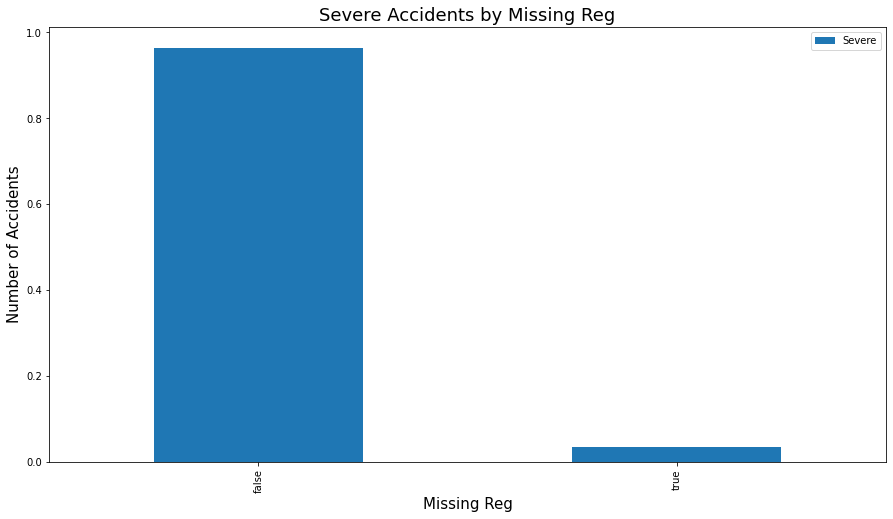

In [ ]:
a = accident_data['MissingResistration'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['MissingResistration'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].count()
a.plot(kind='bar',figsize=(15,8) ,label="Severe")
print(a)
plt.legend()


plt.title('Severe Accidents by Missing Reg', fontsize = 18)

plt.xlabel('Missing Reg', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

false    0.962821
true     0.037179
Name: InvalidResistration, dtype: float64


Text(0, 0.5, 'Number of Accidents')

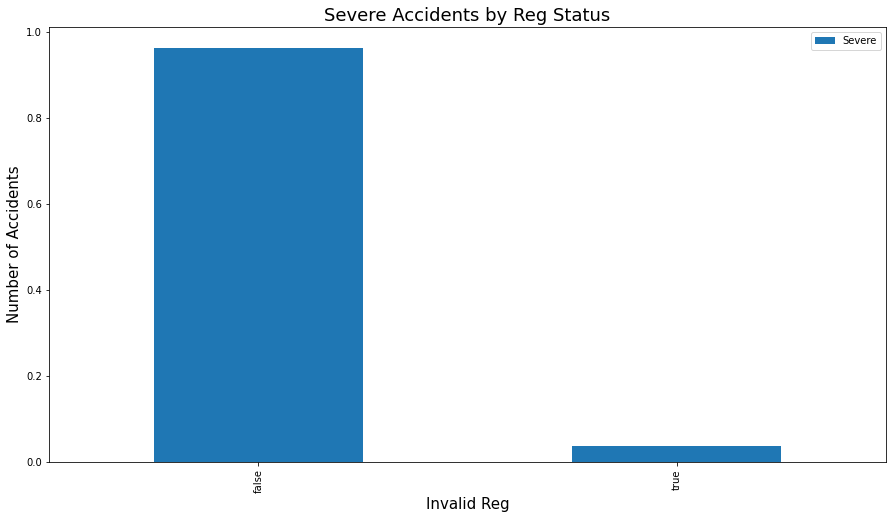

In [ ]:
a = accident_data['InvalidResistration'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['InvalidResistration'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].count()
a.plot(kind='bar',figsize=(15,8) ,label="Severe")
print(a)
plt.legend()


plt.title('Severe Accidents by Reg Status', fontsize = 18)

plt.xlabel('Invalid Reg', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

false    0.992085
true     0.007786
0        0.000128
Name: MissingResistration, dtype: float64


Text(0, 0.5, 'Number of Accidents')

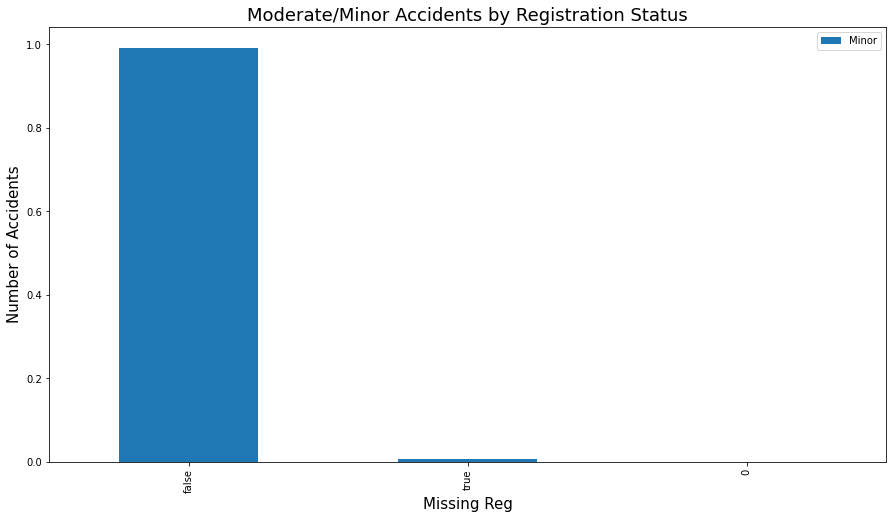

In [ ]:
c = accident_data['MissingResistration'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['MissingResistration'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].count()

c.plot(kind='bar',label="Minor", figsize = (15,8))
print(c)
plt.legend()


plt.title('Moderate/Minor Accidents by Registration Status', fontsize = 18)

plt.xlabel('Missing Reg', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

false    0.980998
true     0.018873
0        0.000128
Name: InvalidResistration, dtype: float64


Text(0, 0.5, 'Number of Accidents')

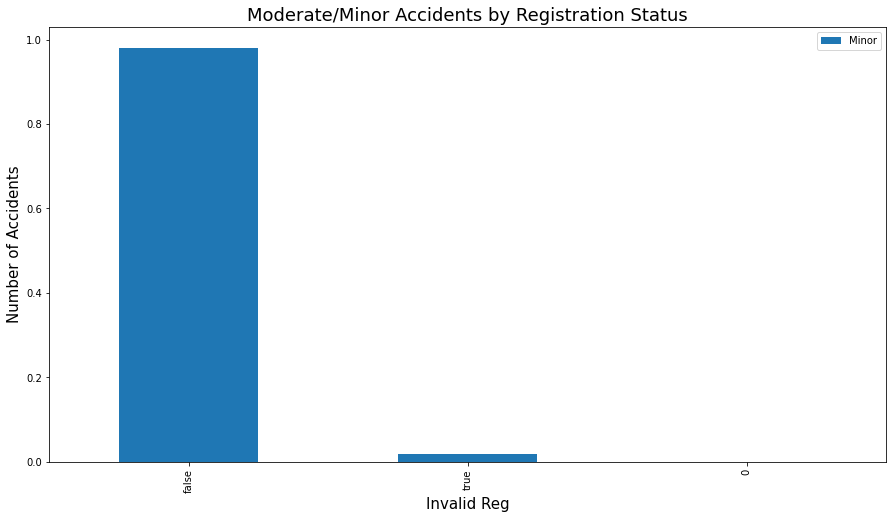

In [ ]:
c = accident_data['InvalidResistration'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['InvalidResistration'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].count()

c.plot(kind='bar',label="Minor", figsize = (15,8))
print(c)
plt.legend()


plt.title('Moderate/Minor Accidents by Registration Status', fontsize = 18)

plt.xlabel('Invalid Reg', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

A higher proportion of people in severe accidents have missing or invalid registration compared to normal accidents. 

Text(0, 0.5, 'Number of Accidents')

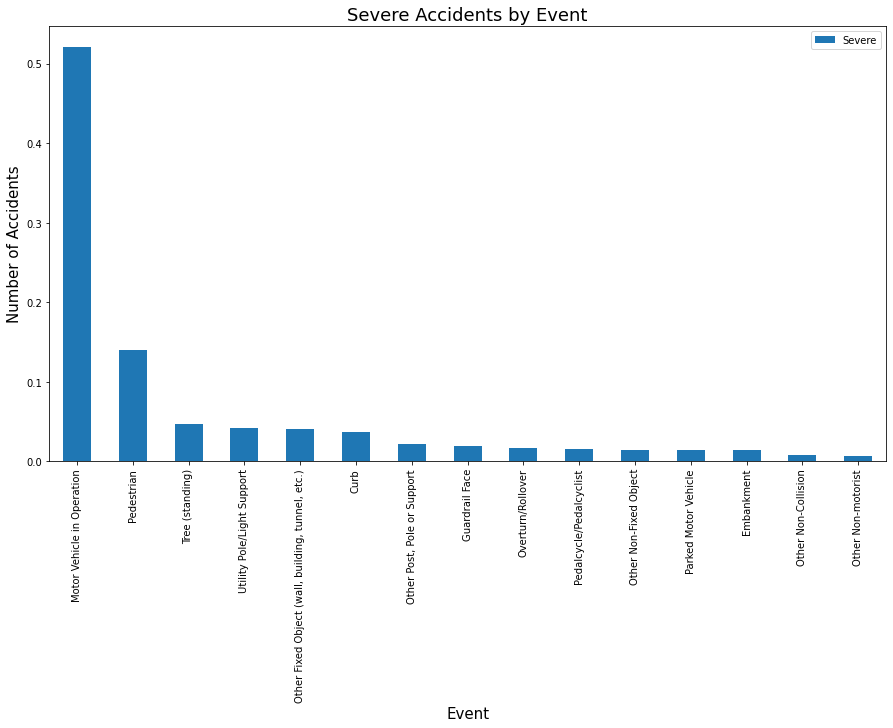

In [ ]:
a = accident_data['FirstHarmfulEventTextFormat'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['FirstHarmfulEventTextFormat'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].count()
a.plot(kind='bar',figsize=(15,8) ,label="Severe")

plt.legend()


plt.title('Severe Accidents by Event', fontsize = 18)

plt.xlabel('Event', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Text(0, 0.5, 'Number of Accidents')

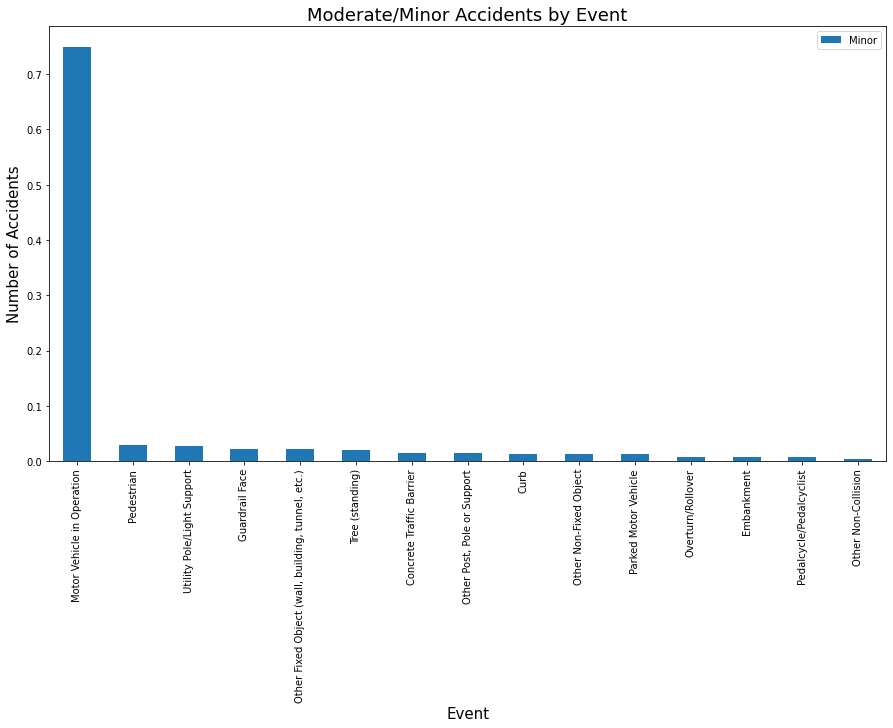

In [ ]:
c = accident_data['FirstHarmfulEventTextFormat'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['FirstHarmfulEventTextFormat'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].count()

c.plot(kind='bar',label="Minor", figsize = (15,8))

plt.legend()


plt.title('Moderate/Minor Accidents by Event', fontsize = 18)

plt.xlabel('Event', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Regular accidents and severe accidents have the same general accident events but severe accidents have a higher proportion of hitting pedestrians, trees, or utility poles. 

Text(0, 0.5, 'Number of Accidents')

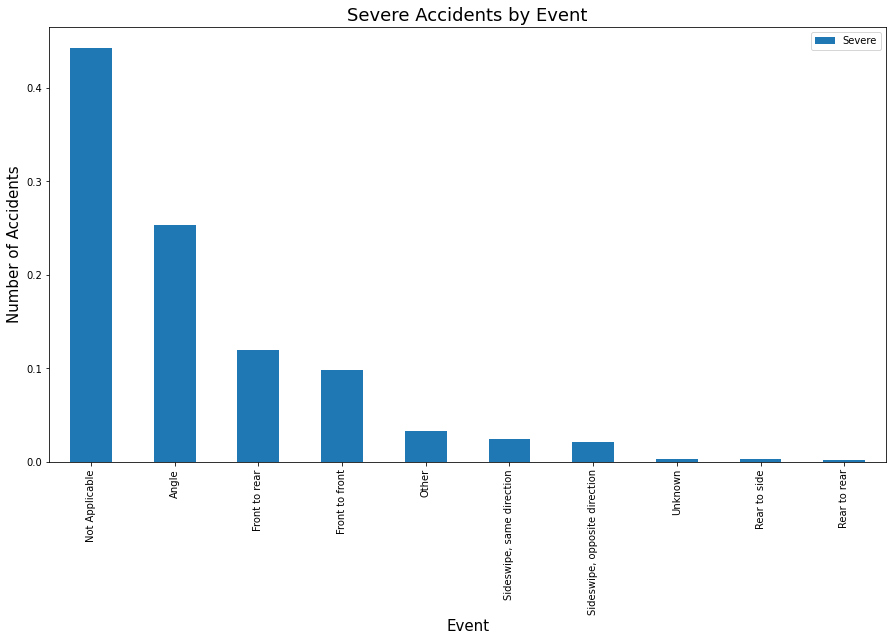

In [ ]:
a = accident_data['MannerofCrash/CollisionImpactTextFormat'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['MannerofCrash/CollisionImpactTextFormat'][accident_data['MostSevereInjuryTextFormat'] == 'Suspected Serious Injury (A)'].count()
a.plot(kind='bar',figsize=(15,8) ,label="Severe")

plt.legend()


plt.title('Severe Accidents by Event', fontsize = 18)

plt.xlabel('Event', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Text(0, 0.5, 'Number of Accidents')

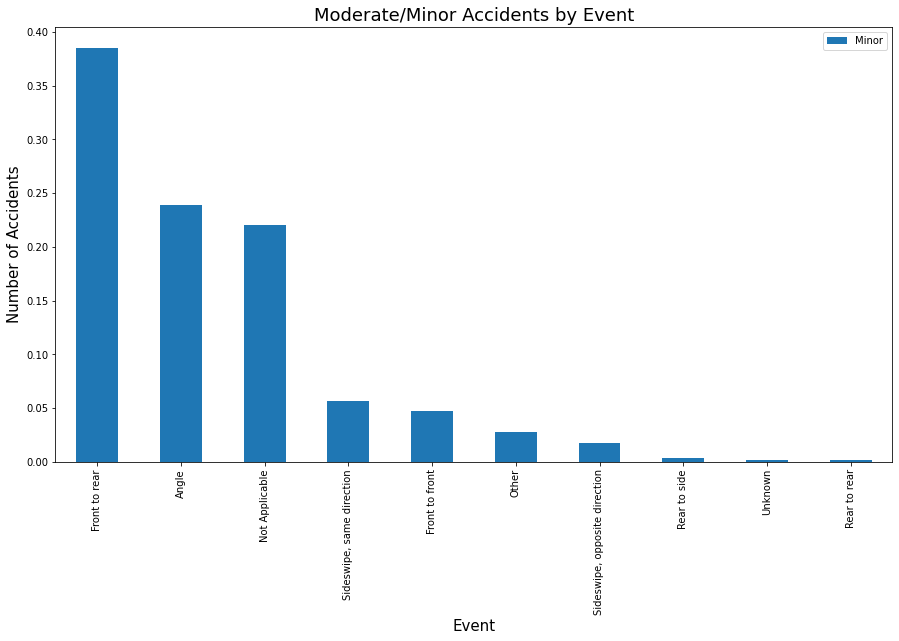

In [ ]:
c = accident_data['MannerofCrash/CollisionImpactTextFormat'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].value_counts()[:15]/accident_data['MannerofCrash/CollisionImpactTextFormat'][accident_data['MostSevereInjuryTextFormat'] != 'Suspected Serious Injury (A)'].count()

c.plot(kind='bar',label="Minor", figsize = (15,8))

plt.legend()


plt.title('Moderate/Minor Accidents by Event', fontsize = 18)

plt.xlabel('Event', fontsize = 15)

plt.ylabel('Number of Accidents' ,fontsize = 15)

Most severe accidents are caused by angle hits, front to rear, head to head, and sideswipes while most normal accidents are front to rear, angles, or sideswipes presuambley being fender bender accidents. 

# Conclusions

### Next Steps

After conducting this analysis, we would suggest to drivers to be more cautious in population dense areas like cities and the costal downs by the sound. Avoiding rush hour traffic hours is also a very large risk mitigation strategy. Young drivers should be more dillgent and young adults should be careful driving late on weekends. Even though this anlysis gave us good insight on CT traffic patterns, there are more things we should look into:


Direct
1.   Accidents by more detailed driver demographics. 
2.   How non lethal accidents differ with lethal accidents.
3.   How speed impacts accident serverity
4.   Costs associated with accidents

Indirect
1. How to better avoid risky sitations.
2. How insurance can offer products and costs that can be tailored by the risk at time of day. 

To complete these steps, we would need to find more data including accident valuations and better models to incorporate photos. 

## Lessons Learned and Technical Challenges

While doing this analysis, we learned multiple aspects of using Python for data analysis. We started by presenting our data and exploring it to prep it for analysis such as looking at data types, describing the table to see descriptive statistics, and cleaning our data by checking for missing values.

On top of those, we also used different features such as pandas and matplotlib to dig into our data, edit our data, and visualize it to help answer analytical questions.

As for technical challenges, most were eliminated by using one set code structure for creating charts. This was able to make creating new charts easy and efficent. 

The dataset was so large with over 200k rows we were able to filter the data down to have little missing information and still be able to upload to github. That made the information much more useful and easy to work with. 